In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import itertools
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import preprocessing
#from statsmodels.sandbox.regression.predstd import wls_prediction_std

%matplotlib inline

pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

/home/isabella/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:53: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
df_handset = pd.read_csv('Dados/merge_usuarios_handset_ibge.csv')
df_city = pd.read_csv('Dados/cidades_info_polygon.csv')

In [3]:
df = pd.merge(df_city,df_handset,left_on='Código do Município',right_on="city_ibge_home")

In [4]:
#removendo atributos desnecesários
remove_attributes = ['#device_id_','latitude_work','longitude_work','geocodigo_setor_work','latitude_home','longitude_home','geocodigo_setor_home',
                    'Nome_do_municipio','city_ibge_work','Cod_bairro','Cod_distrito','Cod_meso','Cod_municipio','Cod_setor','Cod_subdistrito',
                    'Nome_Grande_Regiao','Nome_da_UF','Nome_do_subdistrito','Situacao_setor','Tipo_setor','media_moradores_por_domicilio',
                    'media_rendimento_medio_por_morador_com_ou_sem_renda','media_rendimento_medio_por_morador_com_renda','media_rendimento_medio_por_morador_reponsavel_com_ou_sem_Renda',
                    'media_rendimento_medio_por_morador_responsavel_com_renda','n_alfabetizados_homens','n_alfabetizados_mulheres','n_amarelos',
                    'n_brancos','n_domicilios','n_homens','n_idade_0_10','n_idade_11_20','n_idade_21_30','n_idade_31_40','n_idade_41_50','n_idade_51_60',
                    'n_idade_61_70','n_idade_71_100','n_indigenas','n_moradores','n_mulheres','n_pardos','n_pretos','variancia_moradores_por_domicilio',
                    'perc_n_mulheres','perc_n_homens','perc_n_mulheres_alfabetizados','perc_n_homens_alfabetizados','perc_n_amarelos','perc_n_brancos',
                    'perc_n_indigenas','perc_n_pardos','perc_n_pretos','perc_n_idade_0_10','perc_n_idade_11_20','perc_n_idade_21_30','perc_n_idade_31_40',
                    'perc_n_idade_41_50','perc_n_idade_51_60','perc_n_idade_61_70','perc_n_idade_71_100','Ano', 'Código da Grande Região','Código da Unidade da Federação',
                    'Sigla da Unidade da Federação','Código do Município','Código da Mesorregião','Região Metropolitana','Código da Microrregião','Código da Região Rural',
                    'Código da Região Geográfica Imediata','Município da Região Geográfica Imediata','Código da Região Geográfica Intermediária','Nome da Região Geográfica Imediata',
                    'Nome da Região Geográfica Intermediária','Município da Região Geográfica Intermediária',
                    'Código Concentração Urbana','Nome Concentração Urbana','Tipo Concentração Urbana','Código Arranjo Populacional',
                    'Nome Arranjo Populacional','Cidade-Região de São Paulo','city_ibge_home',
                    'name','geometry']
df.drop(columns = remove_attributes, inplace = True)

# 1 Análise exploratória

Como estamos trabalhando com preço, vamos eliminar as linhas que não apresentam preço dos handsets.

In [5]:
df = df[df['Preço(R$)']>0]

In [6]:
#Linhas | colunas
df.shape

(63296, 48)

In [7]:
df

,Nome da Grande Região,Nome da Unidade da Federação,Nome do Município,Nome da Mesorregião,Nome da Microrregião,Nome da Região Rural,Tipo da Região Rural,Amazônia Legal,Semiárido,Tipologia Rural-Urbana,Hierarquia Urbana,Hierarquia Urbana (principais categorias),"Valor adicionado bruto da Agropecuária, a preços correntes (R$ 1000)","Valor adicionado bruto da Indústria, a preços correntes (R$ 1000)","Valor adicionado bruto dos Serviços, a preços correntes - exclusive Administração, defesa, educação e saúde públicas e seguridade social (R$ 1000)","Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social (R$ 1000)","Valor adicionado bruto total, a preços correntes (R$ 1000)","Impostos, líquidos de subsídios, sobre produtos, a preços correntes (R$ 1000)","Produto Interno Bruto, a preços correntes (R$ 1000)",População (Nº de habitantes),"Produto Interno Bruto per capita (R$ 1,00)",Atividade com maior valor adicionado bruto,Atividade com segundo maior valor adicionado bruto,Atividade com terceiro maior valor adicionado bruto,handset,nome comercial,Marca,Modelo,Capacidade Bateria (mAh),Memória RAM (GB),Memória Armazenamento(GB),Bluetooth,NFC,Dual chip,LTE,Resolução câmera (Mpx),Peso (g),Dimensões (larguraxalturaxespessura),Tamanho tela,Sistema Operacional,Versão SO,Processamento (MHz),Link das fontes,Data atualização,Ano lançamento,Preço(R$),Avaliação Site,Avaliação Usuario
0,Norte,Rondônia,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,Região Rural da Capital Regional de Porto Velho,Região Rural da Capital Regional,Sim,Não,Intermediário Adjacente,Centro Local,Centro Local,166143,31270,114455,142728,454597,23186,477783,25506,18732,"Administração, defesa, educação e saúde públic...","Pecuária, inclusive apoio à pecuária",Demais serviços,samsung:SM-G610M,Samsung Galaxy J7 Prime,Samsung,Samsung Galaxy J7 Prime,3300.0,3.0,16.0,4.1,NAO,SIM,SIM,13.0,167.0,151.7x75x8,5.5,Android,"7.0,6.0",1600.0,https://www.phonearena.com/,04/2018,09/2016,921.4000,0.0,0.0
1,Norte,Rondônia,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,Região Rural da Capital Regional de Porto Velho,Região Rural da Capital Regional,Sim,Não,Intermediário Adjacente,Centro Local,Centro Local,166143,31270,114455,142728,454597,23186,477783,25506,18732,"Administração, defesa, educação e saúde públic...","Pecuária, inclusive apoio à pecuária",Demais serviços,samsung:SM-J730G,Samsung Galaxy J7 (2017),Samsung,Samsung Galaxy J7 (2017),3600.0,3.0,16.0,4.2,SIM,SIM,SIM,13.0,168.0,74.7x152.4x7.9,5.5,Android,7.0,1600.0,https://www.kimovil.com/pt/,04/2018,06/2017,1120.5000,8.7,0.0
2,Norte,Rondônia,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,Região Rural da Capital Regional de Porto Velho,Região Rural da Capital Regional,Sim,Não,Intermediário Adjacente,Centro Local,Centro Local,166143,31270,114455,142728,454597,23186,477783,25506,18732,"Administração, defesa, educação e saúde públic...","Pecuária, inclusive apoio à pecuária",Demais serviços,LGE:LG-M250,LG K10 2017,LG,LG K10 2017,2800.0,2.0,32.0,4.2,SIM,NAO,SIM,13.0,138.0,148.7x75.2x7.99,5.3,Android,7.0,1500.0,https://www.phonearena.com/,04/2018,02/2017,629.1000,0.0,0.0
3,Norte,Rondônia,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,Região Rural da Capital Regional de Porto Velho,Região Rural da Capital Regional,Sim,Não,Intermediário Adjacente,Centro Local,Centro Local,166143,31270,114455,142728,454597,23186,477783,25506,18732,"Administração, defesa, educação e saúde públic...","Pecuária, inclusive apoio à pecuária",Demais serviços,LGE:LG-M400,LG K10,LG,LG K10,2300.0,2.0,16.0,4.2,SIM,NAO,SIM,13.0,142.0,74.8x146.6x8.8,5.3,Android,6.0,1140.0,https://www.kimovil.com/pt/,04/2018,01/2016,560.2500,7.9,6.1
4,Norte,Rondônia,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,Região Rural da Capital Regional de Porto Velho,Região Rural da Capital Regional,Sim,Não,Intermediário Adjacente,Centro Local,Centro Local,166143,31270,114455,142728,454597,23186,477783,25506,18732,"Administração, defesa, educação e saúde públic.

In [8]:
#verificando os tipos de dados contidos no Dataset
df.dtypes.value_counts()

object     28
float64    11
int64       9
dtype: int64

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
"Valor adicionado bruto da Agropecuária, a preços correntes (R$ 1000)",63296.0,9.746804e+04,1.631059e+05,0.0,17083.0,43867.00,90769.0,1.361551e+06
"Valor adicionado bruto da Indústria, a preços correntes (R$ 1000)",63296.0,7.706143e+06,1.539291e+07,574.0,246485.0,1627216.00,6516717.0,6.330676e+07
"Valor adicionado bruto dos Serviços, a preços correntes - exclusive Administração, defesa, educação e saúde públicas e seguridade social (R$ 1000)",63296.0,4.143451e+07,1.073645e+08,3335.0,666723.0,3867842.00,23110010.0,4.646570e+08
"Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social (R$ 1000)",63296.0,7.487666e+06,1.668915e+07,8915.0,289067.0,1164691.00,4539806.0,9.205145e+07
"Valor adicionado bruto total, a preços correntes (R$ 1000)",63296.0,5.672579e+07,1.345964e+08,16113.0,1344416.0,7090362.00,34959604.0,5.699105e+08
"Impostos, líquidos de subsídios, sobre produtos, a preços correntes (R$ 1000)",63296.0,1.159700e+07,2.849855e+07,-618.0,146345.0,1020051.00,6201312.0,1.171254e+08
"Produto Interno Bruto, a preços correntes (R$ 1000)",63296.0,6.832279e+07,1.629289e+08,16575.0,1501243.0,8112334.00,39857742.0,6.870359e+08
População (Nº de habitantes),63296.0,1.433350e+06,2.875709e+06,953.0,74964.0,292074.00,1173370.0,1.203818e+07
"Produto Interno Bruto per capita (R$ 1,00)",63296.0,3.221548e+04,2.162219e+04,3191.0,18710.0,27123.00,43735.0,3.146380e+05
Capacidade Bateria (mAh),63296.0,2.847816e+03,5.084539e+02,0.0,2500.0,2800.00,3000.0,8.827000e+03


## Preço

In [10]:
df['Preço(R$)'].describe()

count    63296.000000
mean       836.007691
std        398.804107
min        110.000000
25%        650.100000
50%        825.550000
75%        921.400000
max       6088.008500
Name: Preço(R$), dtype: float64

Podemos observar que o celular mais barato tem o valor de R$\$$110,00 e o mais caro R$\$$6088,00, sendo que a média de preço é R$\$$836,00 e a mediana se aproxima desse valor.

### Outliers

In [11]:
#Tratamento de outliers
df['Preço(R$)'].describe()
fiq = 921.4 - 650.1
lsup = 836.007691 + 1.5 * fiq
linf = 836.007691 - 1.5 * fiq

print("Limite inferior ",linf)
print("Limite superior ", lsup)

Limite inferior  429.0576910000001
Limite superior  1242.957691


In [12]:
outliers = df[df['Preço(R$)']> 1242.957691]
outliers

,Nome da Grande Região,Nome da Unidade da Federação,Nome do Município,Nome da Mesorregião,Nome da Microrregião,Nome da Região Rural,Tipo da Região Rural,Amazônia Legal,Semiárido,Tipologia Rural-Urbana,Hierarquia Urbana,Hierarquia Urbana (principais categorias),"Valor adicionado bruto da Agropecuária, a preços correntes (R$ 1000)","Valor adicionado bruto da Indústria, a preços correntes (R$ 1000)","Valor adicionado bruto dos Serviços, a preços correntes - exclusive Administração, defesa, educação e saúde públicas e seguridade social (R$ 1000)","Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social (R$ 1000)","Valor adicionado bruto total, a preços correntes (R$ 1000)","Impostos, líquidos de subsídios, sobre produtos, a preços correntes (R$ 1000)","Produto Interno Bruto, a preços correntes (R$ 1000)",População (Nº de habitantes),"Produto Interno Bruto per capita (R$ 1,00)",Atividade com maior valor adicionado bruto,Atividade com segundo maior valor adicionado bruto,Atividade com terceiro maior valor adicionado bruto,handset,nome comercial,Marca,Modelo,Capacidade Bateria (mAh),Memória RAM (GB),Memória Armazenamento(GB),Bluetooth,NFC,Dual chip,LTE,Resolução câmera (Mpx),Peso (g),Dimensões (larguraxalturaxespessura),Tamanho tela,Sistema Operacional,Versão SO,Processamento (MHz),Link das fontes,Data atualização,Ano lançamento,Preço(R$),Avaliação Site,Avaliação Usuario
41,Norte,Rondônia,Ariquemes,Leste Rondoniense,Ariquemes,Região Rural da Capital Regional de Porto Velho,Região Rural da Capital Regional,Sim,Não,Urbano,Centro Subregional B,Centro Subregional,145069,353163,879967,589089,1967287,216096,2183383,105896,20618,Demais serviços,"Administração, defesa, educação e saúde públic...",Comércio e reparação de veículos automotores e...,samsung:SM-G925I,Samsung Galaxy S6 Edge,Samsung,Samsung Galaxy S6 edge,2600.0,3.0,128.0,4.1,NAO,NAO,SIM,16.0,132.0,142.1x70.1x7,5.1,Android,"7.0,6.0,5.1,5.0",2100.0,https://www.phonearena.com/,04/2018,04/2015,1967.1565,9.3,8.8
42,Norte,Rondônia,Ariquemes,Leste Rondoniense,Ariquemes,Região Rural da Capital Regional de Porto Velho,Região Rural da Capital Regional,Sim,Não,Urbano,Centro Subregional B,Centro Subregional,145069,353163,879967,589089,1967287,216096,2183383,105896,20618,Demais serviços,"Administração, defesa, educação e saúde públic...",Comércio e reparação de veículos automotores e...,samsung:SM-A730F,Samsung Galaxy A8+ (2018),Samsung,Samsung Galaxy A8+ (2018),3500.0,4.0,64.0,5.0,SIM,SIM,SIM,16.0,191.0,159.9 x 75.7 x 8.3,6.0,Android,7.1.1,1800.0,https://www.tudocelular.com/Samsung/fichas-tec...,20 Sep 18,04/2017,1721.0000,0.0,0.0
65,Norte,Rondônia,Ariquemes,Leste Rondoniense,Ariquemes,Região Rural da Capital Regional de Porto Velho,Região Rural da Capital Regional,Sim,Não,Urbano,Centro Subregional B,Centro Subregional,145069,353163,879967,589089,1967287,216096,2183383,105896,20618,Demais serviços,"Administração, defesa, educação e saúde públic...",Comércio e reparação de veículos automotores e...,motorola:Moto Z2 Play,Motorola Moto Z2 Play,Motorola,Motorola Moto Z2 Play,3000.0,4.0,64.0,4.2,SIM,NAO,SIM,12.0,145.0,156.2x76.2x5.99,5.5,Android,7.1,2200.0,https://www.phonearena.com/,04/2018,06/2017,2070.8500,7.6,0.0
80,Norte,Rondônia,Cacoal,Leste Rondoniense,Cacoal,Região Rural do Centro Sub-regional de Vilhena...,Região Rural do Centro Sub-regional,Sim,Não,Urbano,Centro Subregional B,Centro Subregional,188005,230109,846490,485242,1749846,194940,1944787,87877,22131,Demais serviços,"Administração, defesa, educação e saúde públic...",Comércio e reparação de veículos automotores e...,samsung:SM-A710M,Samsung Galaxy A7 (2016),Samsung,Samsung Galaxy A7 (2016),3300.0,3.0,16.0,4.1,SIM,NAO,SIM,13.0,169.0,151.5x74.1x7.3,5.5,Android,5.1,1600.0,https://www.phonearena.com/,04/2018,12/2015,1315.5100,0.0,0.0
84,Norte,Rondônia,Cacoal,Leste Rondoniense,Cacoal,Região Rural do Centro Sub-regional de Vilhena...,Região Rural do Centro Sub-regional,Sim,Não,Urbano,Centro Subregio

## Correlações

In [13]:
corr = df.corr('spearman')
corr = corr[['Preço(R$)']].sort_values(by = ['Preço(R$)'],ascending = False)
corr

,Preço(R$)
Preço(R$),1.000000
Resolução câmera (Mpx),0.500951
Tamanho tela,0.408145
Capacidade Bateria (mAh),0.385780
Processamento (MHz),0.367573
Peso (g),0.342532
Memória RAM (GB),0.286605
Avaliação Usuario,0.119828
Bluetooth,0.114792
"Produto Interno Bruto per capita (R$ 1,00)",0.082836


In [14]:
aux = df

In [15]:
aux.rename(columns={'Valor adicionado bruto da Agropecuária, a preços correntes (R$ 1000)' : 'V.a.b da Agropecuária','Valor adicionado bruto da Indústria, a preços correntes (R$ 1000)': 'V.a.b da Indústria','Valor adicionado bruto dos Serviços, a preços correntes - exclusive Administração, defesa, educação e saúde públicas e seguridade social (R$ 1000)':'V.a.b dos Serviços','Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social (R$ 1000)':'V.a.b da Adm, defesa, saude e seguridade','Valor adicionado bruto total, a preços correntes (R$ 1000)':'V.a.b total','Impostos, líquidos de subsídios, sobre produtos, a preços correntes (R$ 1000)':'Imposto liq de subsídios','Produto Interno Bruto, a preços correntes (R$ 1000)':'PIB','Produto Interno Bruto per capita (R$ 1,00)':'PIB per capita'}, inplace= True)

In [16]:
aux2 = aux.groupby(['Nome do Município',]).agg({'Preço(R$)' : ['mean', 'min', 'max','median','count']})
aux = pd.merge(aux,aux2,how = 'left', on=['Nome do Município','Nome do Município'])
aux.drop_duplicates(subset="Nome do Município",keep = 'last',inplace = True)

In [17]:
aux.reset_index()
aux = aux.rename(columns={('Preço(R$)','mean'):"Preço(R$)_mean",('Preço(R$)','min'):"Preço(R$)_min",('Preço(R$)','max'):"Preço(R$)_max",('Preço(R$)','median'):"Preço(R$)_median",('Preço(R$)','count'):"Preço(R$)_count"})

In [18]:
maior = aux[aux['Preço(R$)_mean'] >= 3000]
maior = maior[maior['Preço(R$)_count'] < 50]
maior = maior.index
maior

Int64Index([12417, 38288, 43068, 55597], dtype='int64')

In [19]:
aux.drop(maior , inplace=True)
aux

,Nome da Grande Região,Nome da Unidade da Federação,Nome do Município,Nome da Mesorregião,Nome da Microrregião,Nome da Região Rural,Tipo da Região Rural,Amazônia Legal,Semiárido,Tipologia Rural-Urbana,Hierarquia Urbana,Hierarquia Urbana (principais categorias),V.a.b da Agropecuária,V.a.b da Indústria,V.a.b dos Serviços,"V.a.b da Adm, defesa, saude e seguridade",V.a.b total,Imposto liq de subsídios,PIB,População (Nº de habitantes),PIB per capita,Atividade com maior valor adicionado bruto,Atividade com segundo maior valor adicionado bruto,Atividade com terceiro maior valor adicionado bruto,handset,nome comercial,Marca,Modelo,Capacidade Bateria (mAh),Memória RAM (GB),Memória Armazenamento(GB),Bluetooth,NFC,Dual chip,LTE,Resolução câmera (Mpx),Peso (g),Dimensões (larguraxalturaxespessura),Tamanho tela,Sistema Operacional,Versão SO,Processamento (MHz),Link das fontes,Data atualização,Ano lançamento,Preço(R$),Avaliação Site,Avaliação Usuario,Preço(R$)_mean,Preço(R$)_min,Preço(R$)_max,Preço(R$)_median,Preço(R$)_count
8,Norte,Rondônia,Alta Floresta D'Oeste,Leste Rondoniense,Cacoal,Região Rural da Capital Regional de Porto Velho,Região Rural da Capital Regional,Sim,Não,Intermediário Adjacente,Centro Local,Centro Local,166143,31270,114455,142728,454597,23186,477783,25506,18732,"Administração, defesa, educação e saúde públic...","Pecuária, inclusive apoio à pecuária",Demais serviços,samsung:SM-J250M,Samsung Galaxy J2 (2018),Samsung,Samsung Galaxy J2 (2018),2600.0,2.0,16.0,4.2,SIM,NAO,SIM,8.0,153.0,72.3x143.8x8.4,5.0,Android,7.1,1400.0,https://www.kimovil.com/pt/,20 Sep 18,janeiro 2018,494.1000,7.1,0.0,828.418889,494.10,1120.5000,921.400,9
71,Norte,Rondônia,Ariquemes,Leste Rondoniense,Ariquemes,Região Rural da Capital Regional de Porto Velho,Região Rural da Capital Regional,Sim,Não,Urbano,Centro Subregional B,Centro Subregional,145069,353163,879967,589089,1967287,216096,2183383,105896,20618,Demais serviços,"Administração, defesa, educação e saúde públic...",Comércio e reparação de veículos automotores e...,LG Electronics:LG-X230,LG K4 2017,LG,LG K4 2017,2500.0,1.0,8.0,4.1,NAO,NAO,SIM,5.0,138.0,144.7x72.6x7.9,5.0,Android,6.0,1100.0,https://www.phonearena.com/,04/2018,03/2017,428.0000,0.0,0.0,819.360421,428.00,2070.8500,804.320,63
116,Norte,Rondônia,Cacoal,Leste Rondoniense,Cacoal,Região Rural do Centro Sub-regional de Vilhena...,Região Rural do Centro Sub-regional,Sim,Não,Urbano,Centro Subregional B,Centro Subregional,188005,230109,846490,485242,1749846,194940,1944787,87877,22131,Demais serviços,"Administração, defesa, educação e saúde públic...",Comércio e reparação de veículos automotores e...,samsung:SM-A720F,Samsung Galaxy A7 (2017),Samsung,Samsung Galaxy A7 (2017),3600.0,3.0,32.0,4.2,NAO,SIM,SIM,16.0,186.0,156.8x77.6x7.9,5.7,Android,"7.0,6.0",1900.0,https://www.phonearena.com/,04/2018,01/2017,1349.1000,0.0,0.0,923.745111,429.00,3543.1000,921.400,45
118,Norte,Rondônia,Corumbiara,Leste Rondoniense,Colorado do Oeste,Região Rural da Capital Regional de Porto Velho,Região Rural da Capital Regional,Sim,Não,Rural Remoto,Centro Local,Centro Local,132177,10033,30211,55417,227837,8741,236578,8749,27041,"Pecuária, inclusive apoio à pecuária","Administração, defesa, educação e saúde públic...","Agricultura, inclusive apoio à agricultura e a...",samsung:SM-G570M,Samsung Galaxy J5 Prime (2017),Samsung,Samsung Galaxy J5 Prime (2017),2500.0,3.0,32.0,0.0,NAO,NAO,SIM,13.0,0.0,142.7x69.6x8.1,5.0,Android,7.1,1400.0,https://www.phonearena.com/,04/2018,0,650.1000,0.0,0.0,815.005000,650.10,979.9100,815.005,2
121,Norte,Rondônia,Costa Marques,Madeira-Guaporé,Guajará-Mirim,Região Rural da Capital Regional de Porto Velho,Região Rural da Capital Regional,Sim,Não,Rural Remoto,Centro Local,Centro Local,62562,6620,38862,91020,199064,7059,206123,17031,12103,"Administração, defesa, educação e saúde públic...","Pecuária, inclusive apoio à pecuária",Demais serviços,samsung:SM-J320M,Samsung Galaxy J3 (2016),Samsung,Samsung Galaxy J3 (2016),2600.0,1.0,8.0,4.0,SIM,NAO,SIM

<function matplotlib.pyplot.show(*args, **kw)>

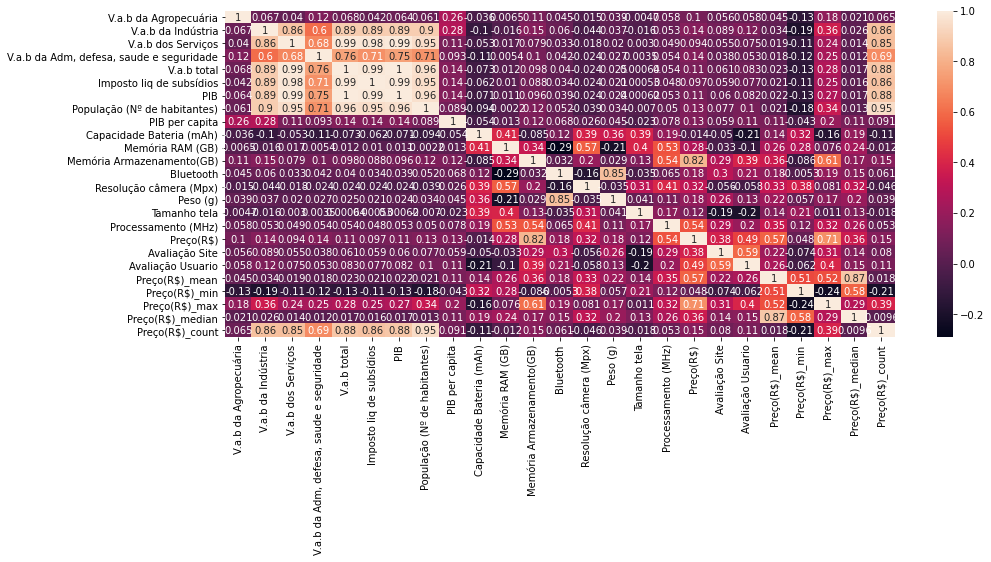

In [20]:
plt.figure(figsize=(15,6))
sns.heatmap(aux.corr(),annot = True)
plt.show

In [21]:
df.rename(columns={'V.a.b da Agropecuária':'Valor adicionado bruto da Agropecuária, a preços correntes (R$ 1000)','V.a.b da Indústria':'Valor adicionado bruto da Indústria, a preços correntes (R$ 1000)','V.a.b dos Serviços': 'Valor adicionado bruto dos Serviços, a preços correntes - exclusive Administração, defesa, educação e saúde públicas e seguridade social (R$ 1000)','V.a.b da Adm, defesa, saude e seguridade':'Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social (R$ 1000)','V.a.b total':'Valor adicionado bruto total, a preços correntes (R$ 1000)','Imposto liq de subsídios':'Impostos, líquidos de subsídios, sobre produtos, a preços correntes (R$ 1000)','PIB':'Produto Interno Bruto, a preços correntes (R$ 1000)','PIB per capita':'Produto Interno Bruto per capita (R$ 1,00)'}, inplace= True)
aux.rename(columns={'V.a.b da Agropecuária':'Valor adicionado bruto da Agropecuária, a preços correntes (R$ 1000)','V.a.b da Indústria':'Valor adicionado bruto da Indústria, a preços correntes (R$ 1000)','V.a.b dos Serviços': 'Valor adicionado bruto dos Serviços, a preços correntes - exclusive Administração, defesa, educação e saúde públicas e seguridade social (R$ 1000)','V.a.b da Adm, defesa, saude e seguridade':'Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social (R$ 1000)','V.a.b total':'Valor adicionado bruto total, a preços correntes (R$ 1000)','Imposto liq de subsídios':'Impostos, líquidos de subsídios, sobre produtos, a preços correntes (R$ 1000)','PIB':'Produto Interno Bruto, a preços correntes (R$ 1000)','PIB per capita':'Produto Interno Bruto per capita (R$ 1,00)'}, inplace= True)

## Normalização de colunas

In [22]:
valores = ['Valor adicionado bruto da Agropecuária, a preços correntes (R$ 1000)','Valor adicionado bruto total, a preços correntes (R$ 1000)',
          'Valor adicionado bruto dos Serviços, a preços correntes - exclusive Administração, defesa, educação e saúde públicas e seguridade social (R$ 1000)',
          'Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social (R$ 1000)'
          ,'Impostos, líquidos de subsídios, sobre produtos, a preços correntes (R$ 1000)',
          'Produto Interno Bruto, a preços correntes (R$ 1000)','População (Nº de habitantes)','Valor adicionado bruto da Indústria, a preços correntes (R$ 1000)']

In [23]:
auxiliar = aux[valores]

In [24]:
auxiliar

,"Valor adicionado bruto da Agropecuária, a preços correntes (R$ 1000)","Valor adicionado bruto total, a preços correntes (R$ 1000)","Valor adicionado bruto dos Serviços, a preços correntes - exclusive Administração, defesa, educação e saúde públicas e seguridade social (R$ 1000)","Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social (R$ 1000)","Impostos, líquidos de subsídios, sobre produtos, a preços correntes (R$ 1000)","Produto Interno Bruto, a preços correntes (R$ 1000)",População (Nº de habitantes),"Valor adicionado bruto da Indústria, a preços correntes (R$ 1000)"
8,166143,454597,114455,142728,23186,477783,25506,31270
71,145069,1967287,879967,589089,216096,2183383,105896,353163
116,188005,1749846,846490,485242,194940,1944787,87877,230109
118,132177,227837,30211,55417,8741,236578,8749,10033
121,62562,199064,38862,91020,7059,206123,17031,6620
...,...,...,...,...,...,...,...,...
62129,47162,79977,13771,15989,3914,83892,3154,3055
62204,426,2084016,1245114,551218,215293,2299309,156419,287258
62207,131262,346906,137090,53285,26650,373557,13567,25269
62211,150950,323540,100499,32985,21239,344779,8286,39106


In [25]:
min_max_scaler = preprocessing.MinMaxScaler()

In [26]:
x = auxiliar.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
auxiliar2 = pd.DataFrame(x_scaled)
auxiliar2

,0,1,2,3,4,5,6,7
0,0.122025,0.000769,0.000239,0.001454,0.000203,0.000671,0.002040,0.000485
1,0.106547,0.003424,0.001887,0.006303,0.001850,0.003154,0.008718,0.005570
2,0.138081,0.003042,0.001815,0.005175,0.001670,0.002807,0.007221,0.003626
3,0.097078,0.000372,0.000058,0.000505,0.000080,0.000320,0.000648,0.000149
4,0.045949,0.000321,0.000076,0.000892,0.000066,0.000276,0.001336,0.000096
...,...,...,...,...,...,...,...,...
3724,0.034638,0.000112,0.000022,0.000077,0.000039,0.000098,0.000183,0.000039
3725,0.000313,0.003629,0.002672,0.005892,0.001843,0.003323,0.012915,0.004529
3726,0.096406,0.000580,0.000288,0.000482,0.000233,0.000520,0.001048,0.000390
3727,0.110866,0.000539,0.000209,0.000262,0.000187,0.000478,0.000609,0.000609


In [27]:
auxiliar2 = auxiliar2.rename(columns= {0:'Valor adicionado bruto da Agropecuária, a preços correntes (R$ 1000)_n',1:'Valor adicionado bruto total, a preços correntes (R$ 1000)_n',2 : 'Valor adicionado bruto dos Serviços, a preços correntes - exclusive Administração, defesa, educação e saúde públicas e seguridade social (R$ 1000)_n',3 : 'Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social (R$ 1000)_n',4 : 'Impostos, líquidos de subsídios, sobre produtos, a preços correntes (R$ 1000)_n',5:'Produto Interno Bruto, a preços correntes (R$ 1000)_n', 6 : 'População (Nº de habitantes)_n',7: 'Valor adicionado bruto da Indústria, a preços correntes (R$ 1000)_n'})

In [28]:
auxiliar = pd.merge(aux,auxiliar2,left_index=True, right_index=True)

In [29]:
auxiliar = auxiliar.drop(columns={'Valor adicionado bruto da Agropecuária, a preços correntes (R$ 1000)','Valor adicionado bruto total, a preços correntes (R$ 1000)',
          'Valor adicionado bruto dos Serviços, a preços correntes - exclusive Administração, defesa, educação e saúde públicas e seguridade social (R$ 1000)',
          'Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social (R$ 1000)'
          ,'Impostos, líquidos de subsídios, sobre produtos, a preços correntes (R$ 1000)',
          'Produto Interno Bruto, a preços correntes (R$ 1000)','População (Nº de habitantes)','Valor adicionado bruto da Indústria, a preços correntes (R$ 1000)'})

In [30]:
auxiliar = auxiliar.rename(columns= {'Valor adicionado bruto da Agropecuária, a preços correntes (R$ 1000)_n':'Valor adicionado bruto da Agropecuária, a preços correntes (R$ 1000)','Valor adicionado bruto total, a preços correntes (R$ 1000)_n':'Valor adicionado bruto total, a preços correntes (R$ 1000)','Valor adicionado bruto dos Serviços, a preços correntes - exclusive Administração, defesa, educação e saúde públicas e seguridade social (R$ 1000)_n' : 'Valor adicionado bruto dos Serviços, a preços correntes - exclusive Administração, defesa, educação e saúde públicas e seguridade social (R$ 1000)','Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social (R$ 1000)_n' : 'Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social (R$ 1000)','Impostos, líquidos de subsídios, sobre produtos, a preços correntes (R$ 1000)_n' : 'Impostos, líquidos de subsídios, sobre produtos, a preços correntes (R$ 1000)','Produto Interno Bruto, a preços correntes (R$ 1000)_n':'Produto Interno Bruto, a preços correntes (R$ 1000)', 'População (Nº de habitantes)_n' : 'População (Nº de habitantes)','Valor adicionado bruto da Indústria, a preços correntes (R$ 1000)_n': 'Valor adicionado bruto da Indústria, a preços correntes (R$ 1000)'})

## Regressão Linear Simples

### Variavel alvo -> Preço(R$)_mean

**Conceitos:**
- *variável preditora*: é a variável independente, que tem o poder de influenciar na variável que nós queremos encontrar. 
- *variável alvo ou dependente*: é a variável que queremos prever. 
- O *R2* indica em porcentagem o quanto o modelo consegue explicar os valores observados. Sendo assim, quanto maior o valor do coeficiente de relação, mais explicativo é o modelo e melhor ele se ajusta à amostra.


In [31]:
variavel_preditora = ['Valor adicionado bruto da Agropecuária, a preços correntes (R$ 1000)','Valor adicionado bruto total, a preços correntes (R$ 1000)',
'Valor adicionado bruto dos Serviços, a preços correntes - exclusive Administração, defesa, educação e saúde públicas e seguridade social (R$ 1000)',
'Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social (R$ 1000)','Impostos, líquidos de subsídios, sobre produtos, a preços correntes (R$ 1000)',
'Produto Interno Bruto, a preços correntes (R$ 1000)','População (Nº de habitantes)','Produto Interno Bruto per capita (R$ 1,00)','Valor adicionado bruto da Indústria, a preços correntes (R$ 1000)'
]
variavel_alvo = ['Preço(R$)_mean']

X: Valor adicionado bruto da Agropecuária, a preços correntes (R$ 1000)
Score: 0.017639167883074403
Coef: [[-464.19162159]]
Intercept [821.2574695]


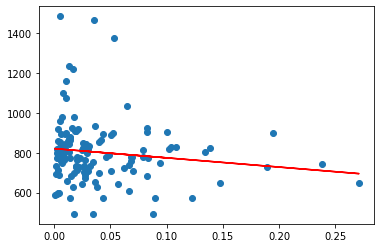

X: Valor adicionado bruto total, a preços correntes (R$ 1000)
Score: 0.03373838963998299
Coef: [[-3570.54739203]]
Intercept [810.58804178]


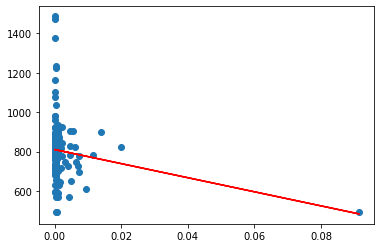

X: Valor adicionado bruto dos Serviços, a preços correntes - exclusive Administração, defesa, educação e saúde públicas e seguridade social (R$ 1000)
Score: 0.0332604632996919
Coef: [[-4368.8306689]]
Intercept [809.19095885]


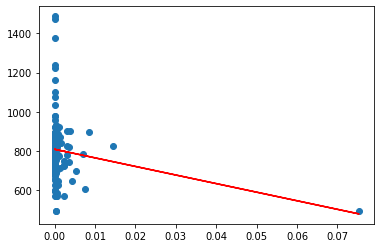

X: Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social (R$ 1000)
Score: 0.030850635035602925
Coef: [[-3545.01304331]]
Intercept [811.49094687]


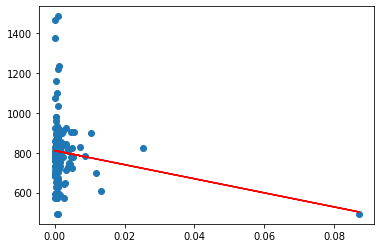

X: Impostos, líquidos de subsídios, sobre produtos, a preços correntes (R$ 1000)
Score: 0.03328329519767259
Coef: [[-4594.25003815]]
Intercept [810.17894248]


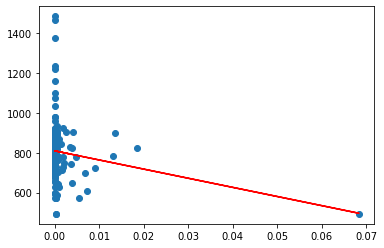

X: Produto Interno Bruto, a preços correntes (R$ 1000)
Score: 0.033745939855317486
Coef: [[-3719.27464843]]
Intercept [810.54114449]


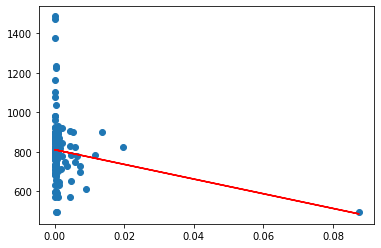

X: População (Nº de habitantes)
Score: 0.030012173295694278
Coef: [[-1424.82622299]]
Intercept [810.48927081]


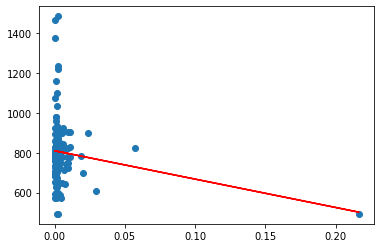

X: Produto Interno Bruto per capita (R$ 1,00)
Score: 0.005362443410512507
Coef: [[0.00202402]]
Intercept [775.82552225]


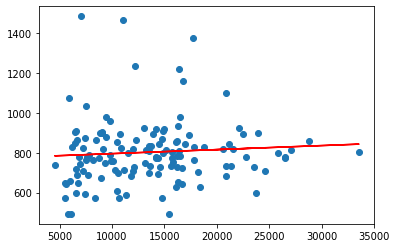

X: Valor adicionado bruto da Indústria, a preços correntes (R$ 1000)
Score: 0.029624292733023135
Coef: [[-1885.26524883]]
Intercept [811.45101883]


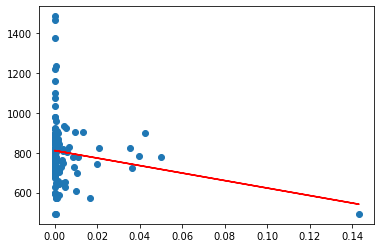

In [32]:
for data in variavel_preditora:
    X = auxiliar[data].values.reshape(-1, 1)
    y = auxiliar[variavel_alvo]
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    print("X:",data)
    print("Score:",linear_regressor.score(X, y))
    print("Coef:",linear_regressor.coef_)
    print("Intercept",linear_regressor.intercept_)
    plt.scatter(X, y)
    plt.plot(X, Y_pred, color='red')
    plt.show()

In [33]:
X = auxiliar[variavel_preditora]
y = auxiliar[variavel_alvo]

In [34]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [35]:
predictions = lm.predict(X)
predictions

array([[755.45087173],
       [805.81330509],
       [811.61514888],
       [824.64061374],
       [754.48294572],
       [793.66280751],
       [789.49533099],
       [827.67584724],
       [836.40224601],
       [793.37409209],
       [811.2465097 ],
       [813.25662465],
       [811.38733265],
       [849.63069382],
       [833.9873971 ],
       [808.07109314],
       [835.81704716],
       [844.79523385],
       [814.91897677],
       [832.84500966],
       [851.8411651 ],
       [830.58087351],
       [821.86414856],
       [765.13179208],
       [832.91648251],
       [497.61498834],
       [828.24921446],
       [823.65683886],
       [820.90969628],
       [822.49907396],
       [832.82508113],
       [804.89739129],
       [839.96766058],
       [765.60616953],
       [817.43316116],
       [836.34859868],
       [834.8556798 ],
       [811.13640602],
       [824.9039147 ],
       [844.74848676],
       [820.14109   ],
       [817.87069549],
       [750.35459258],
       [825

In [36]:
# se der 1, nosso modelo está maravilhosamente bom
lm.score(X,y)

0.05818331762505058

O método coef_ nos fornecerá os coeficientes da equação:

In [37]:
# Verificando o quão relacionados estão X e Y
lm.coef_

array([[ 1.71255655e+07,  2.36989471e+08,  5.84448113e+09,
         1.15771012e+09,  1.52193742e+09, -8.92715775e+09,
         1.44048820e+04,  1.17740035e-03,  7.96278024e+08]])

O intercept_ fornecerão a interceptação do eixo:

In [38]:
lm.intercept_

array([-54603.31450629])

**Legenda OLS Regression Results**
- O **R-squared**  também é chamado de coeficiente de determinação. É uma medida estatística de quão bem a linha de regressão se ajusta aos dados.
- **Adj. R-squared** ajusta as estatísticas com base no número de variáveis independentes presentes.
- A proporção de desvio do valor estimado de um parâmetro do seu valor hipotético para seu erro padrão é chamado  **t-statistic**.
- A **F-statistic** é calculada como a razão entre o erro quadrático médio do modelo e o erro quadrático médio dos resíduos.
- **AIC** significa Akaike Information Criterion , que estima a qualidade relativa dos modelos estatísticos para um determinado conjunto de dados.
- **BIC** significa Bayesian Information Criterion , que é usado como critério para a seleção de modelos entre um conjunto finito de modelos. O BIC é como o AIC, mas acrescenta uma penalidade mais alta aos modelos com mais parâmetros.

In [39]:
model = sm.OLS(y,X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Preço(R$)_mean   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                              354.8
Date:                Mon, 01 Jun 2020   Prob (F-statistic):                    5.02e-83
Time:                        15:44:23   Log-Likelihood:                         -848.40
No. Observations:                 131   AIC:                                      1715.
Df Residuals:                     122   BIC:                                      1741.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
======================================================================================================================================================================================================================
                                                                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Valor adicionado bruto da Agropecuária, a preços correntes (R$ 1000)                                                                               -1.187e+06    1.1e+07     -0.108      0.914    -2.3e+07    2.06e+07
Valor adicionado bruto total, a preços correntes (R$ 1000)                                                                                          2.431e+09   1.86e+10      0.130      0.896   -3.45e+10    3.93e+10
Valor adicionado bruto dos Serviços, a preços correntes - exclusive Administração, defesa, educação e saúde públicas e seguridade social (R$ 1000) -4.049e+08   3.76e+09     -0.108      0.914   -7.84e+09    7.03e+09
Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social (R$ 1000)                                           -8.023e+07   7.44e+08     -0.108      0.914   -1.55e+09    1.39e+09
Impostos, líquidos de subsídios, sobre produtos, a preços correntes (R$ 1000)                                                                       3.976e+08   2.88e+09      0.138      0.891   -5.31e+09    6.11e+09
Produto Interno Bruto, a preços correntes (R$ 1000)                                                                                                -2.332e+09   1.69e+10     -0.138      0.891   -3.58e+10    3.11e+10
População (Nº de habitantes)                                                                                                                        1.293e+04   1.78e+04      0.726      0.469   -2.23e+04    4.82e+04
Produto Interno Bruto per capita (R$ 1,00)                                                                                                             0.0012      0.003      0.489      0.626      -0.004       0.006
Valor adicionado bruto da Indústria, a preços correntes (R$ 1000)                                                                                  -5.517e+07   5.12e+08     -0.108      0.914   -1.07e+09    9.58e+08
==============================================================================
Omnibus:                       57.543   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.702
Skew:                           1.643   Prob(JB):                     1.74e-41
Kurtosis:                       7.857   Cond. No.                     2.65e+13
=========

## Gráficos
### Características handsets (individuais)

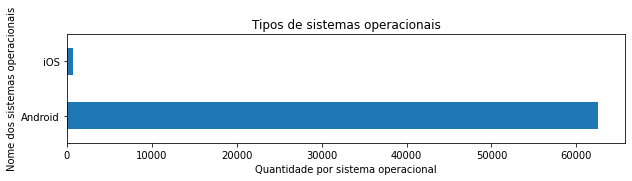

In [40]:
fig = plt.figure(figsize=(10,2))
fig = df['Sistema Operacional'].value_counts().plot.barh()
fig.set_title('Tipos de sistemas operacionais')
fig.set_ylabel('Nome dos sistemas operacionais')
fig.set_xlabel('Quantidade por sistema operacional')
plt.show()

In [41]:
df['Sistema Operacional'].value_counts()

Android    62602
iOS          694
Name: Sistema Operacional, dtype: int64

In [42]:
a = df[['Sistema Operacional','Preço(R$)']]
b = a[a['Sistema Operacional'] == 'iOS']
b.describe()

,Preço(R$)
count,694.000000
mean,2736.626308
std,1162.540118
min,559.000000
25%,1698.000000
50%,3523.350000
75%,3523.350000
max,6088.008500


In [43]:
c = a[a['Sistema Operacional'] == 'Android']
c.describe()

,Preço(R$)
count,62602.000000
mean,814.937608
std,324.585679
min,110.000000
25%,650.100000
50%,825.550000
75%,921.400000
max,4108.430000


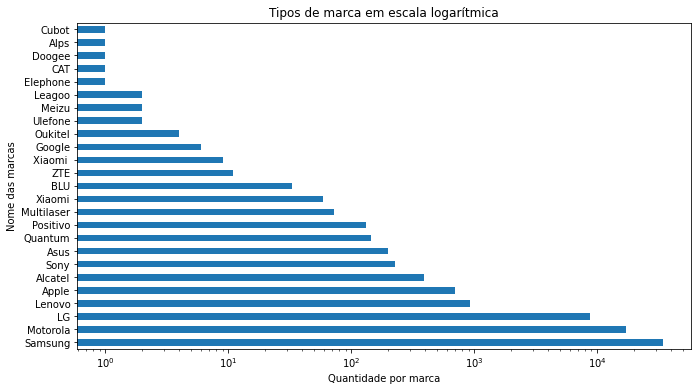

In [44]:
fig = plt.figure(figsize=(11,6))
fig = df['Marca'].value_counts().plot.barh()
fig.set_xscale('log')
fig.set_title('Tipos de marca em escala logarítmica')
fig.set_ylabel('Nome das marcas')
fig.set_xlabel('Quantidade por marca')
plt.show()

25 marcas diferentes de smartphones, sendo que aproximadamente 54% dos handsets são da marca Samsung. 

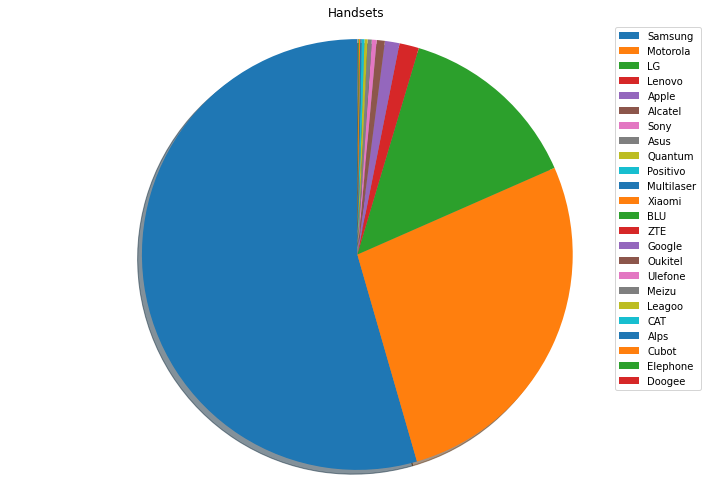

In [45]:
plt.subplots(figsize=(10,7))
plt.title("Handsets")
labels = ['Samsung', 'Motorola','LG','Lenovo','Apple','Alcatel','Sony','Asus','Quantum','Positivo','Multilaser','Xiaomi','BLU','ZTE','Google','Oukitel','Ulefone','Meizu','Leagoo','CAT','Alps','Cubot','Elephone','Doogee']
sizes = [34475,17170,8734,927,694,389,226,199,146,131,72,68,33,11,6,4,2,2,2,1,1,1,1,1]
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
patches, texts = plt.pie(sizes, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [46]:
pip install pandoc

Note: you may need to restart the kernel to use updated packages.


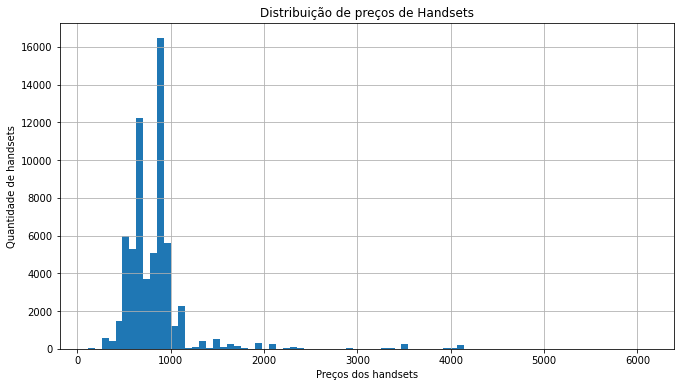

In [47]:
plt.figure(figsize=(11,6))
fig= df['Preço(R$)'].hist(bins = 80)
fig.set_title('Distribuição de preços de Handsets')
fig.set_ylabel('Quantidade de handsets')
fig.set_xlabel('Preços dos handsets')
plt.show()

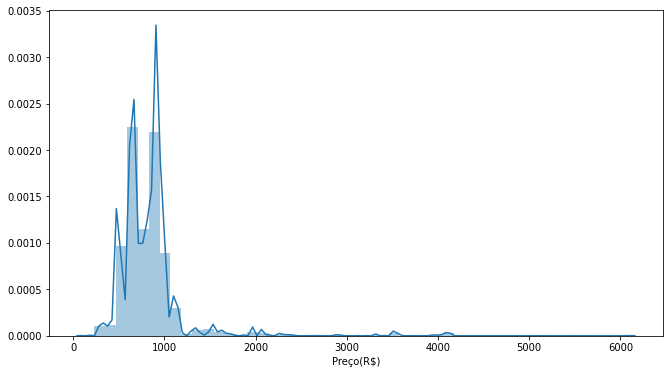

In [48]:
plt.figure(figsize=(11,6))
sns.distplot(df['Preço(R$)'])
plt.show()

Podemos observar uma assimetria à direita ou positiva no histograma acima.

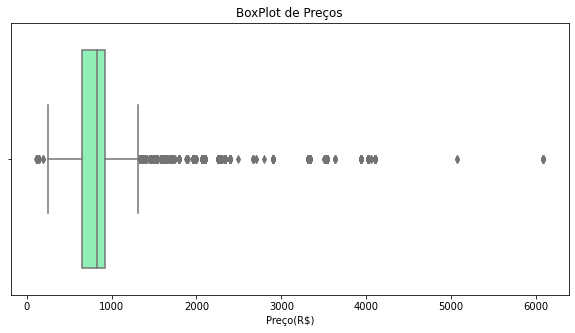

In [49]:
plt.figure(figsize=(10,5))
fig = sns.boxplot(data = df, x = 'Preço(R$)', orient = 'h',palette='rainbow')
fig.set_title("BoxPlot de Preços")
plt.show()

## Cidades

In [50]:
populacao = df.groupby(['Nome da Unidade da Federação','Sistema Operacional']).agg({'Preço(R$)' : ['mean', 'min', 'max','median'],'População (Nº de habitantes)' : ['mean']}).reset_index()

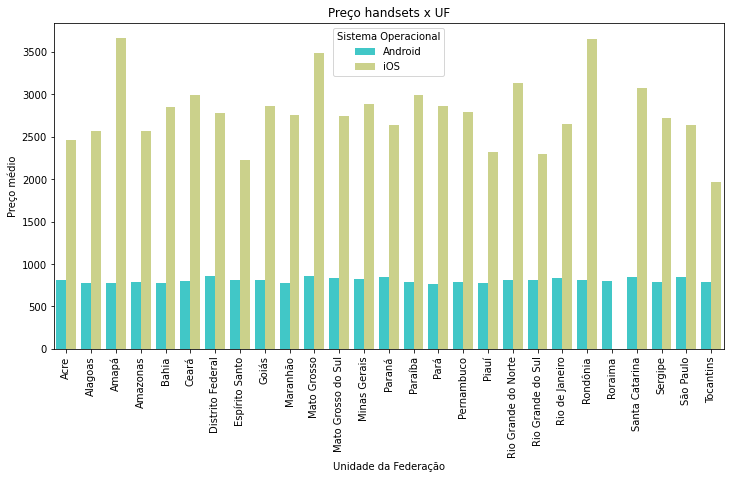

In [51]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Nome da Unidade da Federação' ,y= ('Preço(R$)','mean'), data = populacao, hue='Sistema Operacional',palette='rainbow')
plt.xticks(rotation = 90)
plt.title("Preço handsets x UF")
plt.xlabel("Unidade da Federação")
plt.ylabel("Preço médio")
plt.show()

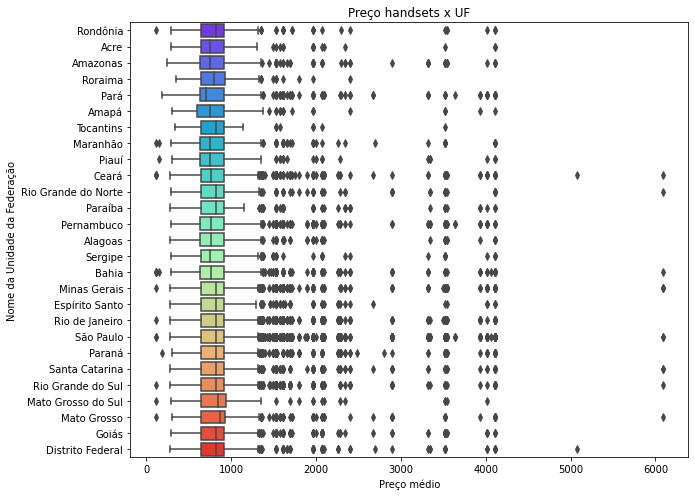

In [52]:
plt.figure(figsize = (10,8))
sns.boxplot(y='Nome da Unidade da Federação', x='Preço(R$)',data=df,palette='rainbow')
plt.title("Preço handsets x UF")
plt.xlabel("Preço médio")
plt.show()

In [53]:
e = df[['Nome da Unidade da Federação','Preço(R$)']]
e['Nome da Unidade da Federação'].describe()

count         63296
unique           27
top       São Paulo
freq          12613
Name: Nome da Unidade da Federação, dtype: object

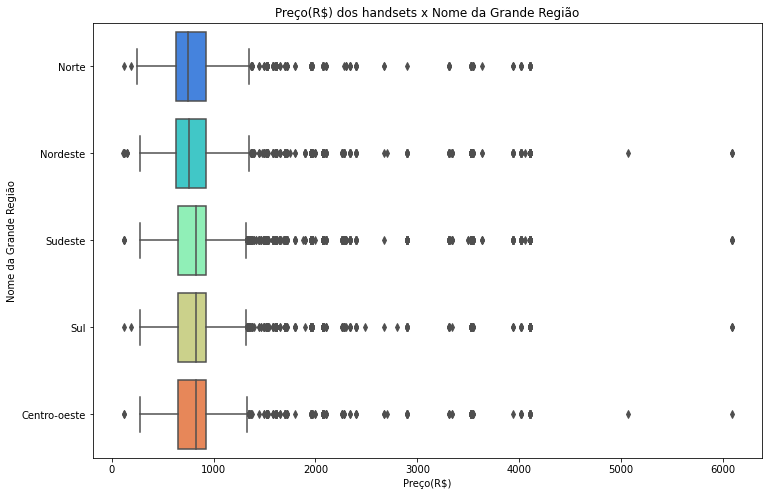

In [54]:
plt.figure(figsize = (12,8))
sns.boxplot(y='Nome da Grande Região', x='Preço(R$)',data=df,palette='rainbow')
plt.title("Preço(R$) dos handsets x Nome da Grande Região")
plt.xlabel("Preço(R$)")
plt.show()

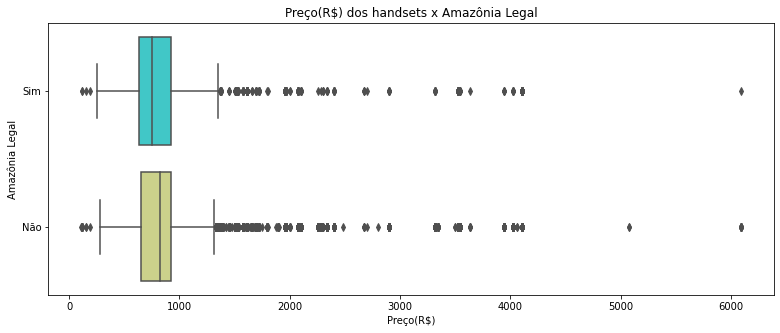

In [55]:
plt.figure(figsize = (13,5))
sns.boxplot(y='Amazônia Legal', x='Preço(R$)',data=df,palette='rainbow')
plt.title("Preço(R$) dos handsets x Amazônia Legal")
plt.xlabel("Preço(R$)")
plt.show()

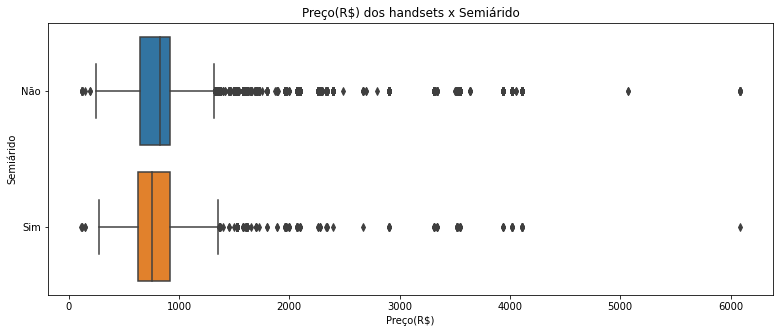

In [56]:
plt.figure(figsize = (13,5))
sns.boxplot(y='Semiárido', x='Preço(R$)',data=df)
plt.title("Preço(R$) dos handsets x Semiárido")
plt.xlabel("Preço(R$)")
plt.show()

In [57]:
df['Semiárido'].value_counts()

Não    56523
Sim     6773
Name: Semiárido, dtype: int64

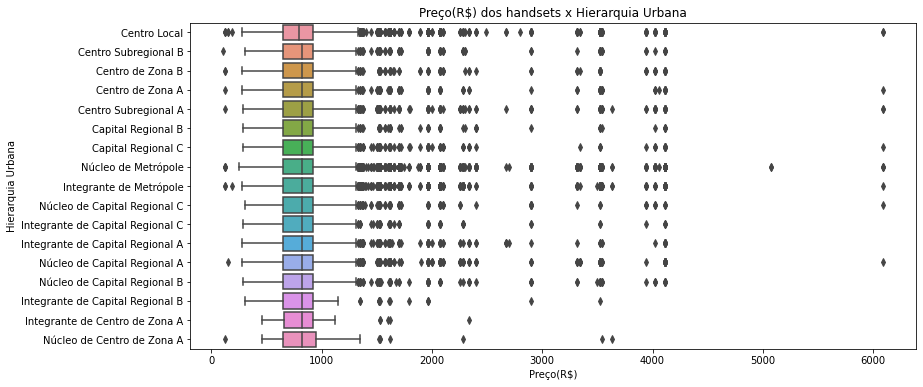

In [58]:
plt.figure(figsize = (13,6))
sns.boxplot(y='Hierarquia Urbana', x='Preço(R$)',data=df)
plt.title("Preço(R$) dos handsets x Hierarquia Urbana")
plt.xlabel("Preço(R$)")
plt.show()

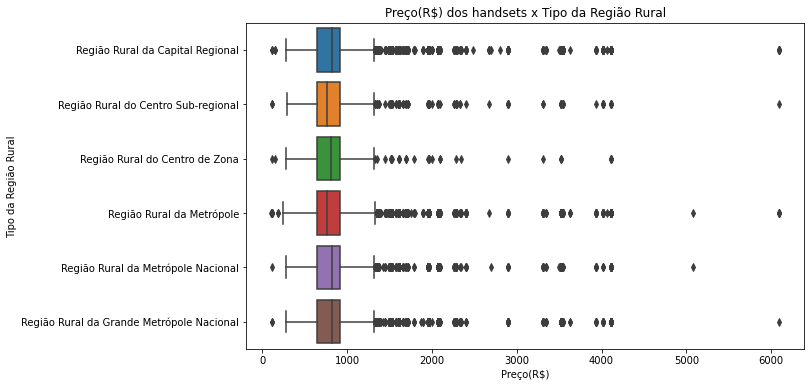

In [59]:
plt.figure(figsize = (10,6))
sns.boxplot(y='Tipo da Região Rural', x='Preço(R$)',data=df)
plt.title("Preço(R$) dos handsets x Tipo da Região Rural")
plt.xlabel("Preço(R$)")
plt.show()

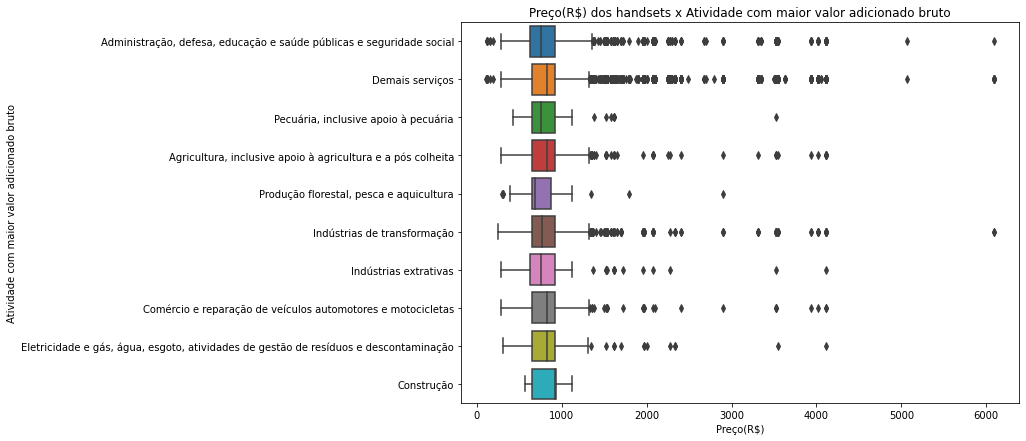

In [60]:
plt.figure(figsize = (10,7))
sns.boxplot(y='Atividade com maior valor adicionado bruto', x='Preço(R$)',data=df)
plt.title("Preço(R$) dos handsets x Atividade com maior valor adicionado bruto")
plt.xlabel("Preço(R$)")
plt.show()

In [61]:
df['Atividade com maior valor adicionado bruto'].value_counts()

Demais serviços                                                                         46067
Administração, defesa, educação e saúde públicas e seguridade social                    10492
Indústrias de transformação                                                              3916
Agricultura, inclusive apoio à agricultura e a pós colheita                              1109
Comércio e reparação de veículos automotores e motocicletas                               615
Indústrias extrativas                                                                     475
Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação      404
Pecuária, inclusive apoio à pecuária                                                      147
Produção florestal, pesca e aquicultura                                                    62
Construção                                                                                  9
Name: Atividade com maior valor adicionado bruto, dtype: int

## Gráficos Handset

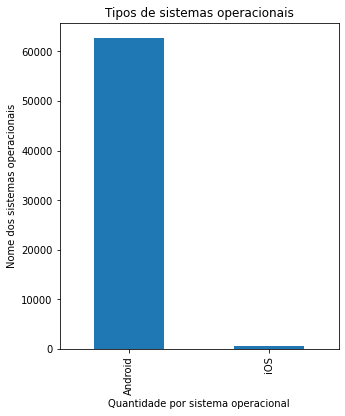

In [62]:
fig = plt.figure(figsize=(5,6))
fig = df['Sistema Operacional'].value_counts().plot.bar()
fig.set_title('Tipos de sistemas operacionais')
fig.set_ylabel('Nome dos sistemas operacionais')
fig.set_xlabel('Quantidade por sistema operacional')
plt.show()

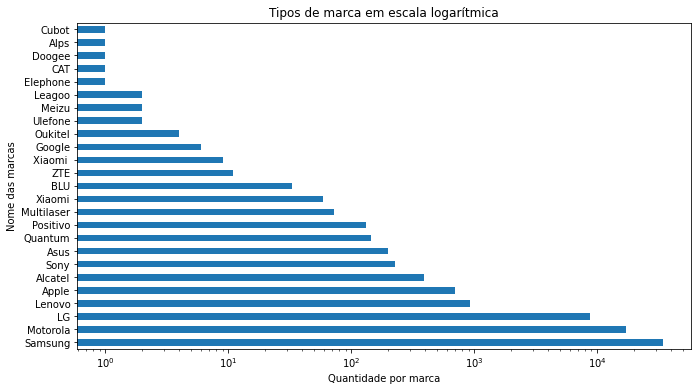

In [63]:
fig = plt.figure(figsize=(11,6))
fig = df['Marca'].value_counts().plot.barh()
fig.set_xscale('log')
fig.set_title('Tipos de marca em escala logarítmica')
fig.set_ylabel('Nome das marcas')
fig.set_xlabel('Quantidade por marca')
plt.show()

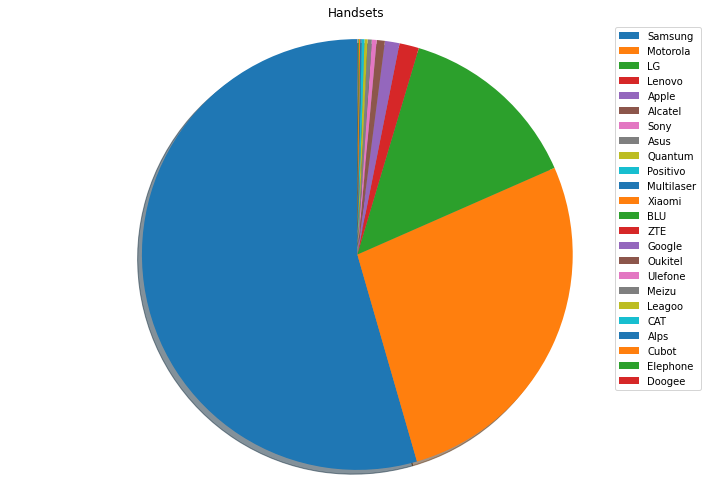

In [64]:
plt.subplots(figsize=(10,7))
plt.title("Handsets")
labels = ['Samsung', 'Motorola','LG','Lenovo','Apple','Alcatel','Sony','Asus','Quantum','Positivo','Multilaser','Xiaomi','BLU','ZTE','Google','Oukitel','Ulefone','Meizu','Leagoo','CAT','Alps','Cubot','Elephone','Doogee']
sizes = [34475,17170,8734,927,694,389,226,199,146,131,72,68,33,11,6,4,2,2,2,1,1,1,1,1]
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
patches, texts = plt.pie(sizes, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

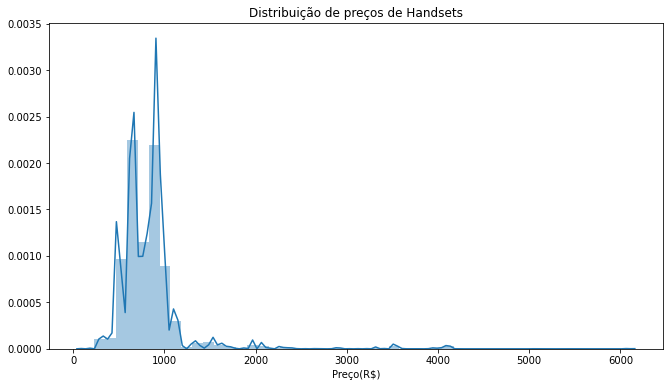

In [65]:
plt.figure(figsize=(11,6))
fig = sns.distplot(df['Preço(R$)'],norm_hist=bool)
fig.set_title('Distribuição de preços de Handsets')
plt.show()

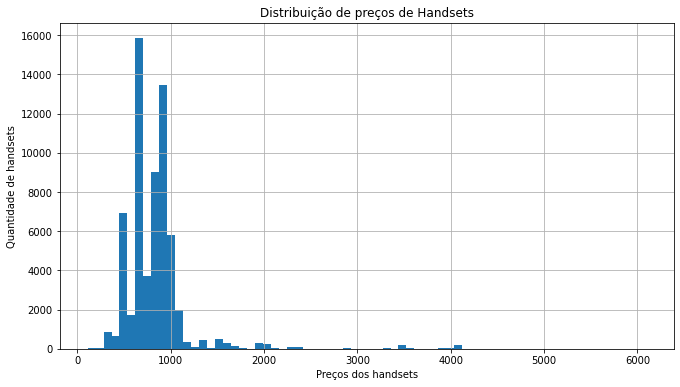

In [66]:
plt.figure(figsize=(11,6))
fig= df['Preço(R$)'].hist(bins = 70)
fig.set_title('Distribuição de preços de Handsets')
fig.set_ylabel('Quantidade de handsets')
fig.set_xlabel('Preços dos handsets')
plt.show()

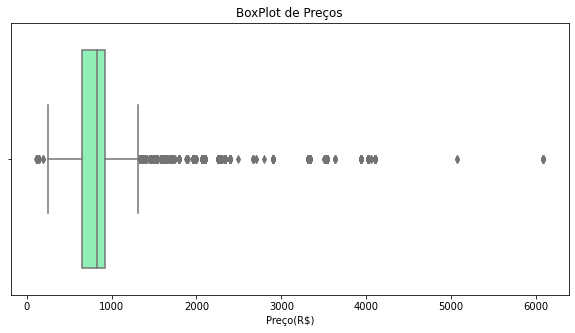

In [67]:
plt.figure(figsize=(10,5))
fig = sns.boxplot(data = df, x = 'Preço(R$)', orient = 'h',palette='rainbow')
fig.set_title("BoxPlot de Preços")
plt.show()

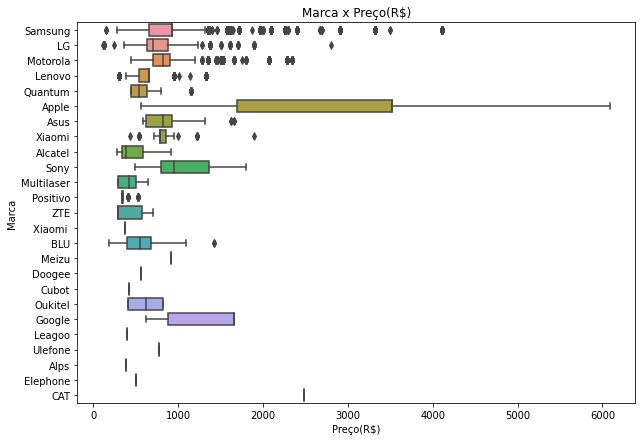

In [68]:
plt.figure(figsize = (10,7))
sns.boxplot(y='Marca', x='Preço(R$)',data=df)
plt.title("Marca x Preço(R$)")
plt.xlabel("Preço(R$)")
plt.show()

In [69]:
d = df[['Resolução câmera (Mpx)','Preço(R$)','Sistema Operacional']]
d = d[d['Resolução câmera (Mpx)'] == 12.0]
d[d['Sistema Operacional'] == 'iOS']

,Resolução câmera (Mpx),Preço(R$),Sistema Operacional
84,12.0,3543.1000,iOS
519,12.0,3543.1000,iOS
561,12.0,4021.3500,iOS
562,12.0,3523.3500,iOS
931,12.0,3523.3500,iOS
...,...,...,...
63295,12.0,2070.8500,iOS
63296,12.0,2070.8500,iOS
63297,12.0,3343.1000,iOS
63298,12.0,3343.1000,iOS


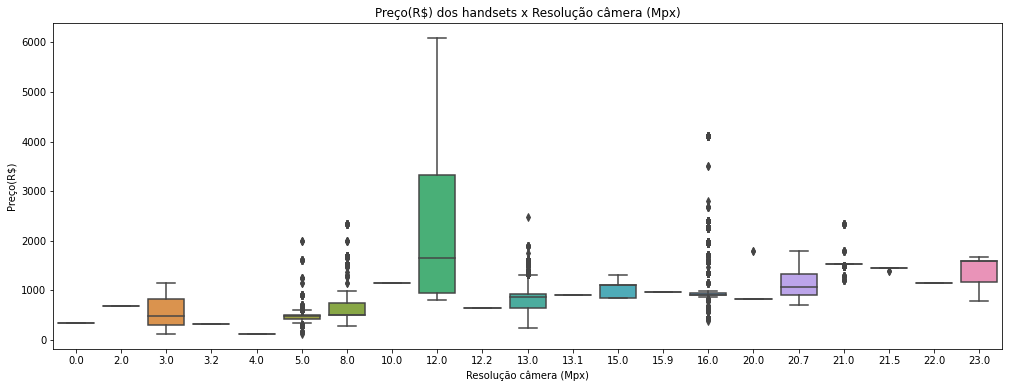

In [70]:
plt.figure(figsize = (17,6))
sns.boxplot(x='Resolução câmera (Mpx)', y='Preço(R$)',data=df)
plt.title("Preço(R$) dos handsets x Resolução câmera (Mpx)")
plt.show()

In [71]:
d = df[['Tamanho tela','Preço(R$)','Sistema Operacional']]
c = d[d['Tamanho tela'] == 4.7]
c[c['Sistema Operacional'] == 'iOS'].describe()

,Tamanho tela,Preço(R$)
count,327.0,327.000000
mean,4.7,2951.661433
std,0.0,840.514527
min,4.7,1698.000000
25%,4.7,1698.000000
50%,4.7,3523.350000
75%,4.7,3523.350000
max,4.7,3633.798100


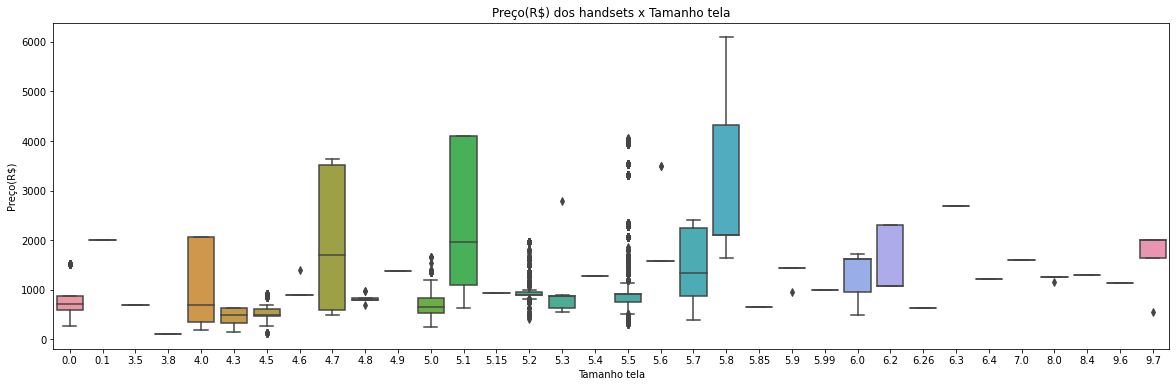

In [72]:
plt.figure(figsize = (20,6))
sns.boxplot(x='Tamanho tela', y='Preço(R$)',data=df)
plt.title("Preço(R$) dos handsets x Tamanho tela")
plt.show()

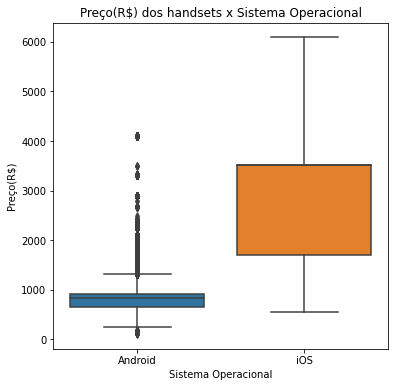

In [73]:
plt.figure(figsize = (6,6))
sns.boxplot(x='Sistema Operacional', y='Preço(R$)',data=df)
plt.title("Preço(R$) dos handsets x Sistema Operacional")
plt.show()

## Gráficos 
### Características handset x Preço

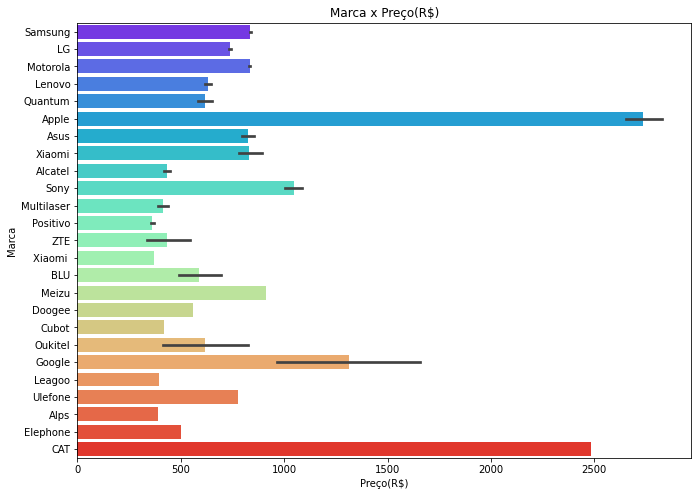

In [74]:
plt.subplots(figsize=(11,8))
sns.barplot(y = 'Marca' ,x= 'Preço(R$)',data = df,palette='rainbow')
plt.title("Marca x Preço(R$)")
plt.show()

In [75]:
atributos = ['Resolução câmera (Mpx)','Tamanho tela','Sistema Operacional', 'LTE','NFC','Bluetooth','Memória Armazenamento(GB)',
            'Memória RAM (GB)','Avaliação Usuario','Dual chip','Avaliação Site']

Resolução câmera (Mpx) X Preço(R$)


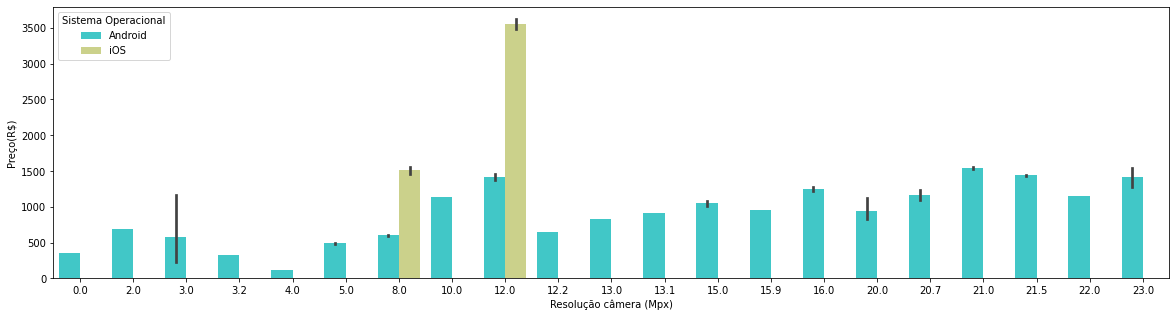

Tamanho tela X Preço(R$)


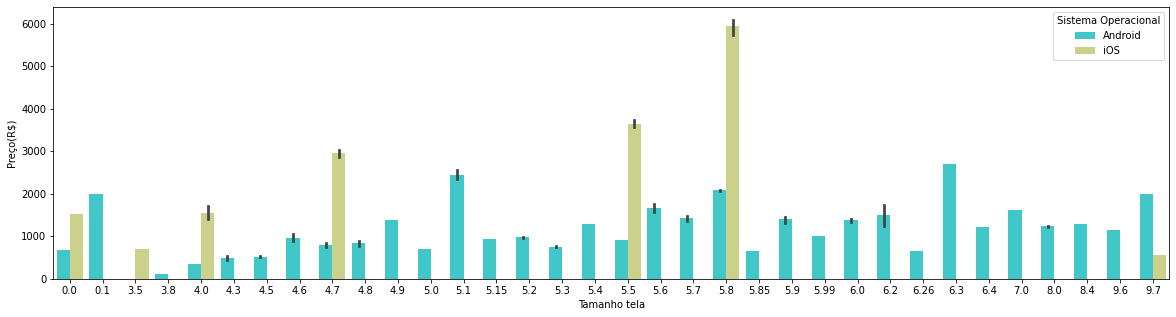

Sistema Operacional X Preço(R$)


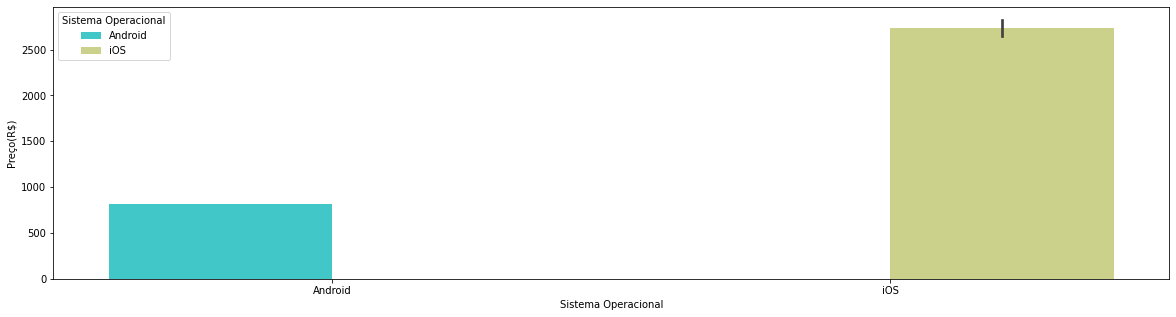

LTE X Preço(R$)


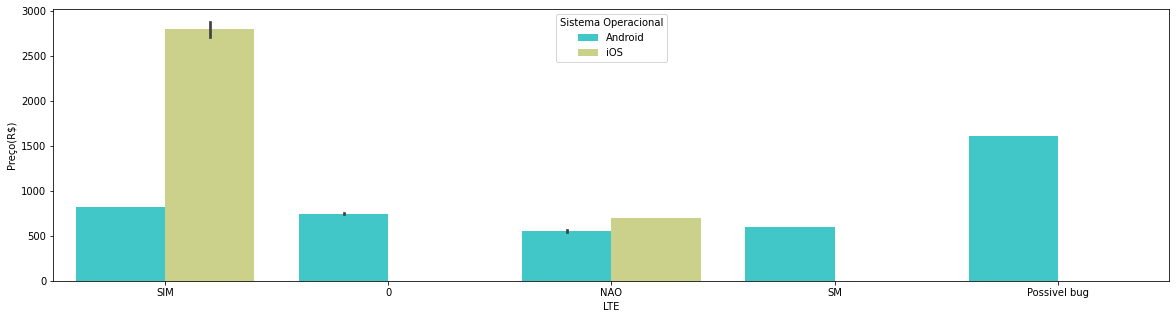

NFC X Preço(R$)


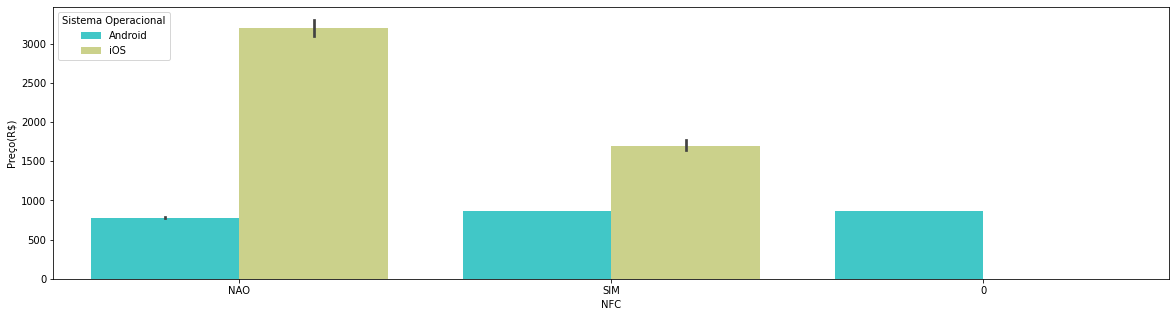

Bluetooth X Preço(R$)


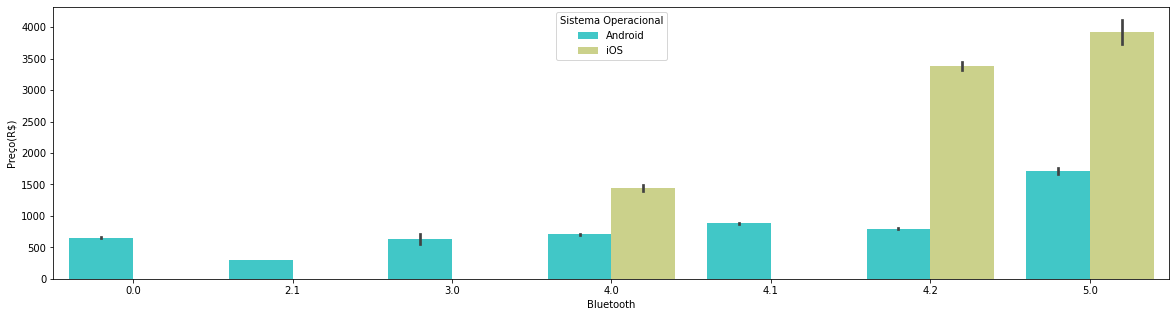

Memória Armazenamento(GB) X Preço(R$)


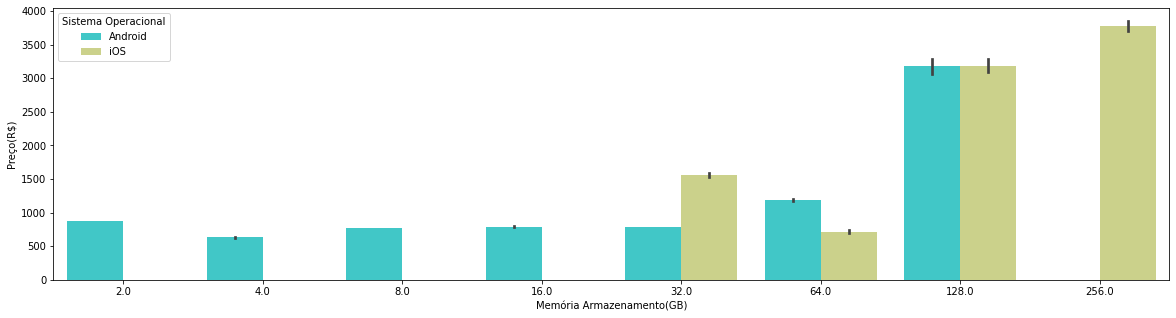

Memória RAM (GB) X Preço(R$)


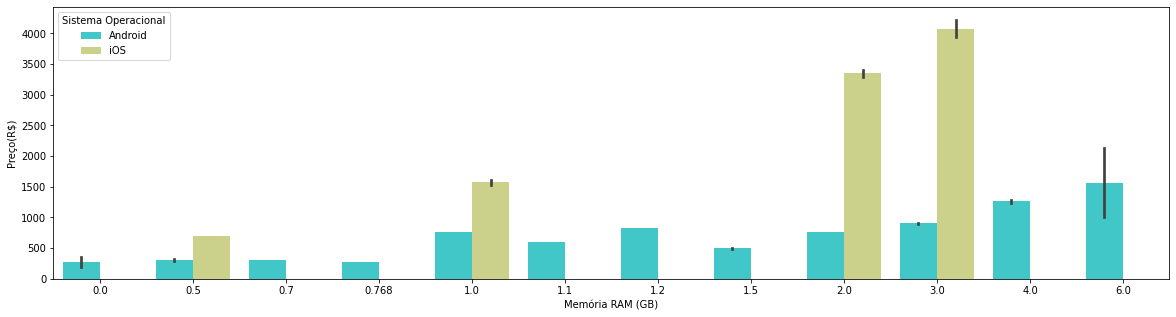

Avaliação Usuario X Preço(R$)


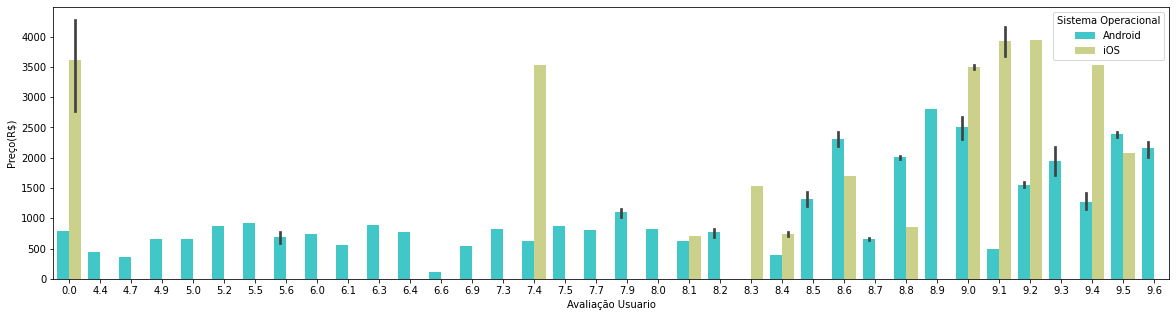

Dual chip X Preço(R$)


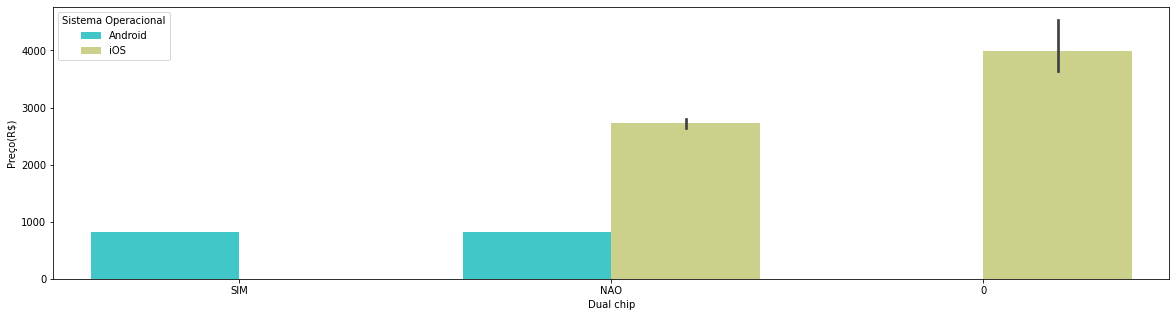

Avaliação Site X Preço(R$)


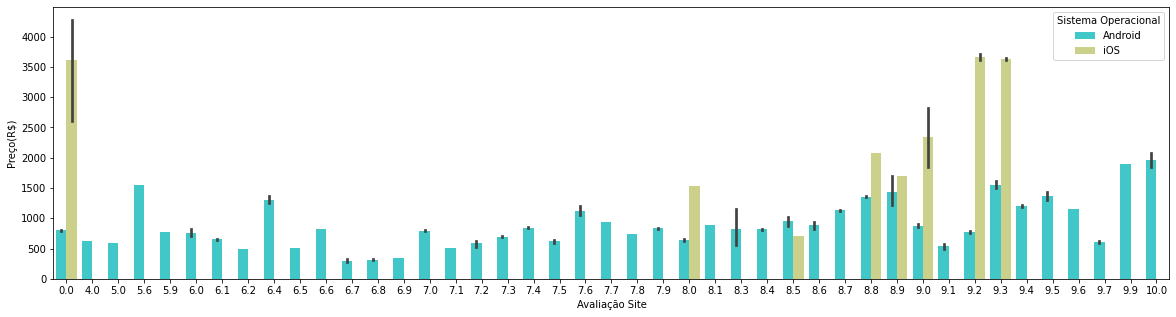

In [76]:
for data in atributos:
    print(data,"X Preço(R$)")
    plt.subplots(figsize=(20,5))
    sns.barplot(x = data ,y= 'Preço(R$)', data = df, hue='Sistema Operacional',palette='rainbow')
    plt.show()

## Gráficos 
### Características cidades x Preço

In [77]:
#g = sns.FacetGrid(df,col='Nome da Unidade da Federação', row = ('População (Nº de habitantes)','mean') )
#g = g.map(plt.hist, ('Preço(R$)','mean'))

In [78]:
atributos = ['Nome da Grande Região','Amazônia Legal','Semiárido']

Nome da Grande Região X Preço(R$)


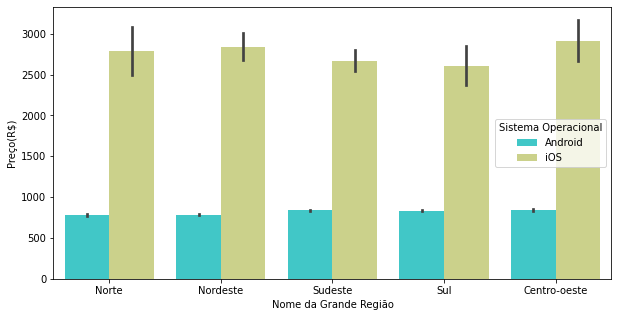

Amazônia Legal X Preço(R$)


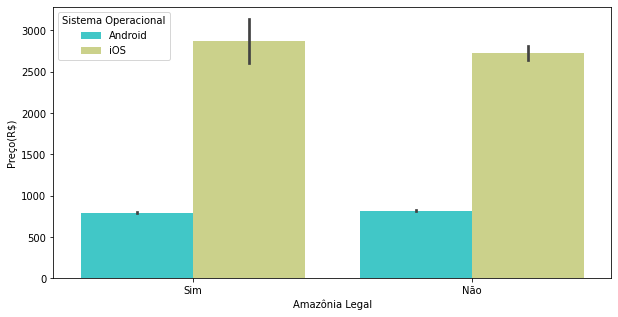

Semiárido X Preço(R$)


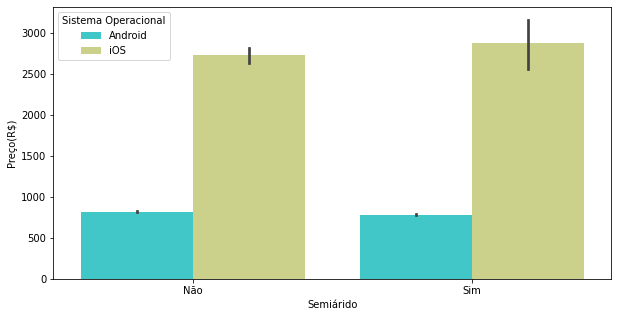

In [79]:
for data in atributos:
    plt.figure(figsize = (10,5))
    print(data,"X Preço(R$)")
    sns.barplot(x = data ,y= 'Preço(R$)', data = df, hue='Sistema Operacional',palette='rainbow')
    plt.show()

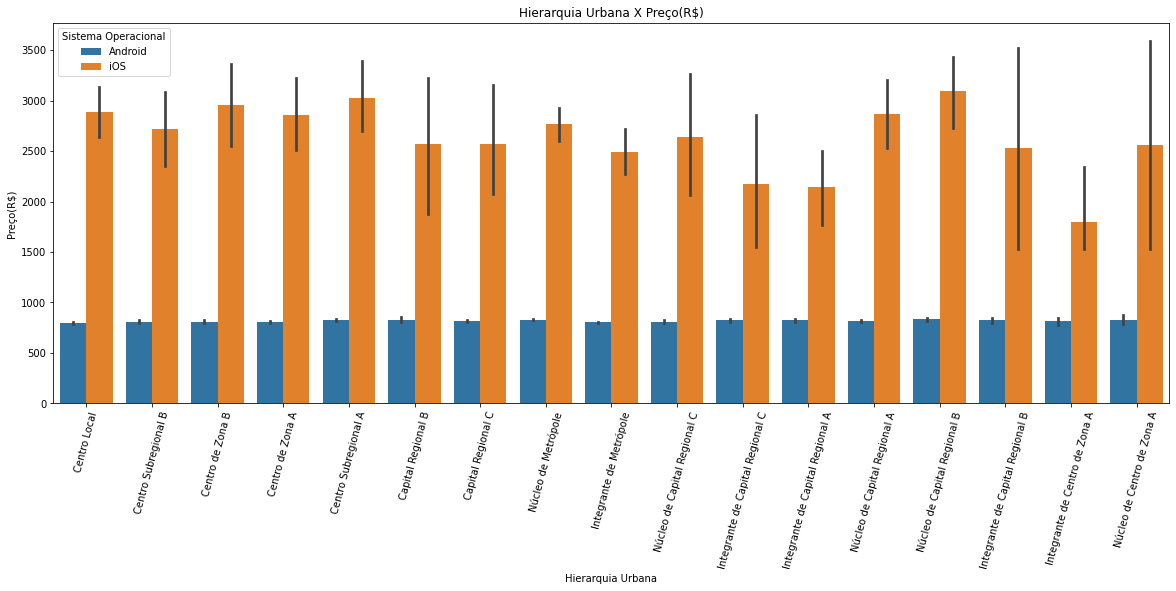

In [80]:
plt.subplots(figsize=(20,7))
plt.title("Hierarquia Urbana X Preço(R$)")
sns.barplot(x = 'Hierarquia Urbana' ,y= 'Preço(R$)', data = df, hue='Sistema Operacional')
plt.xticks(rotation = 75)
plt.show()

In [81]:
atributos = ['Tipo da Região Rural','Tipologia Rural-Urbana']

Tipo da Região Rural X Preço(R$)


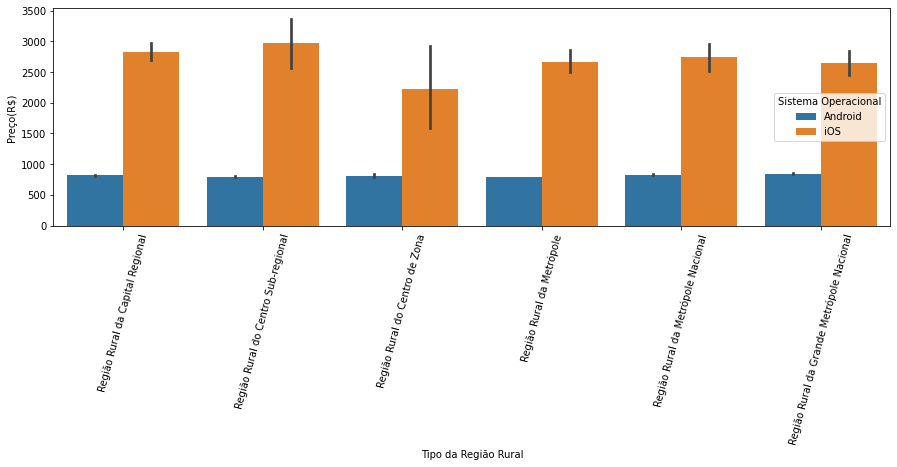

Tipologia Rural-Urbana X Preço(R$)


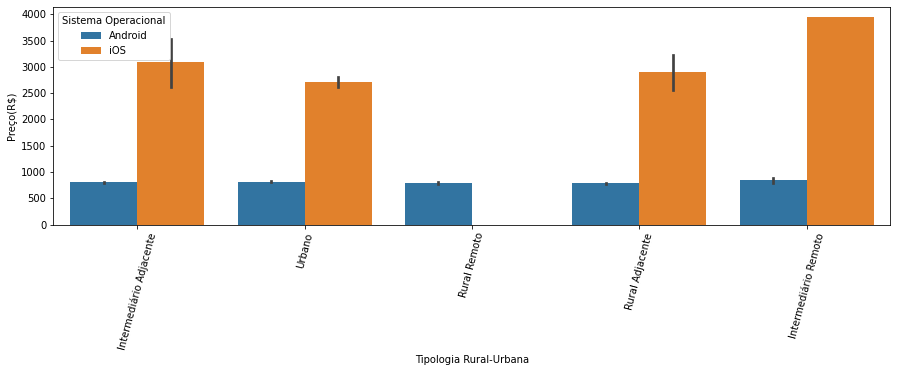

In [82]:
for data in atributos:
    plt.subplots(figsize=(15,4))
    print(data,"X Preço(R$)")
    plt.xticks(rotation = 75)
    sns.barplot(x = data ,y= 'Preço(R$)', data = df, hue='Sistema Operacional')
    plt.show()

In [83]:
atributos=['Atividade com maior valor adicionado bruto',
          'Atividade com segundo maior valor adicionado bruto','Atividade com terceiro maior valor adicionado bruto']

Atividade com maior valor adicionado bruto X Preço(R$)


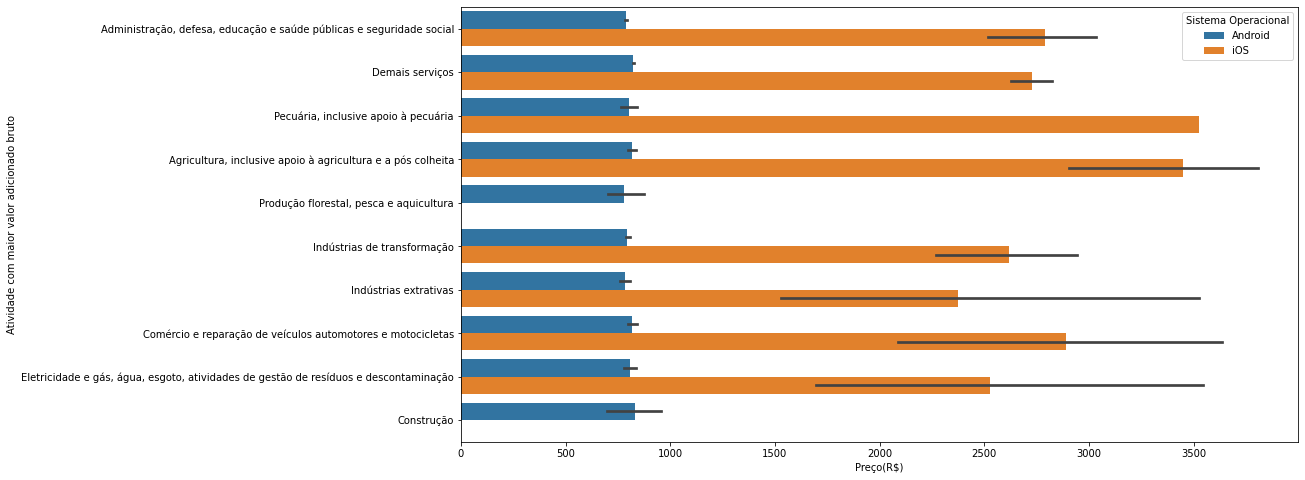

Atividade com segundo maior valor adicionado bruto X Preço(R$)


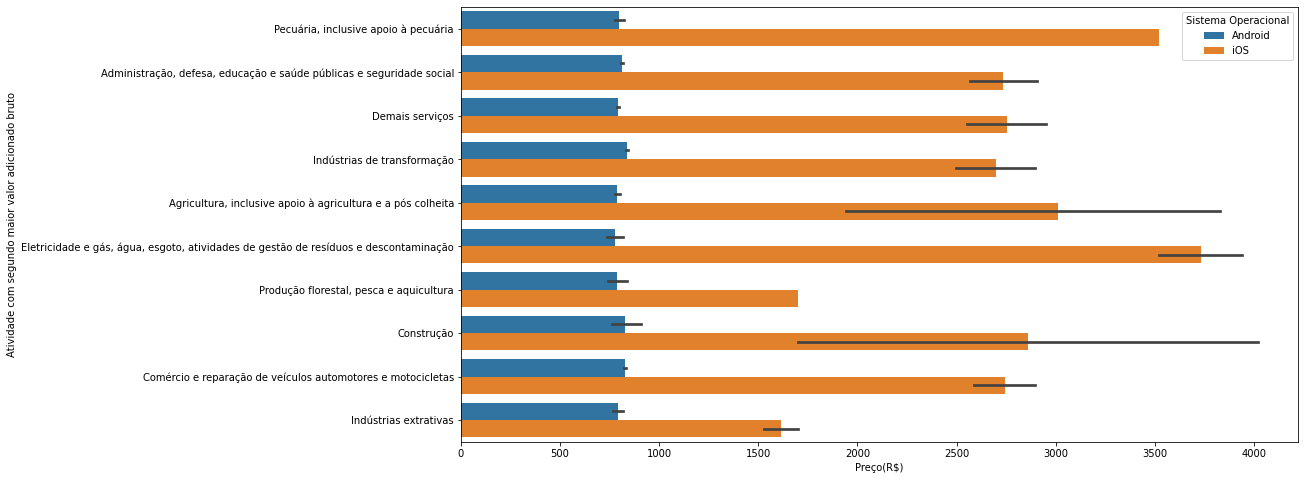

Atividade com terceiro maior valor adicionado bruto X Preço(R$)


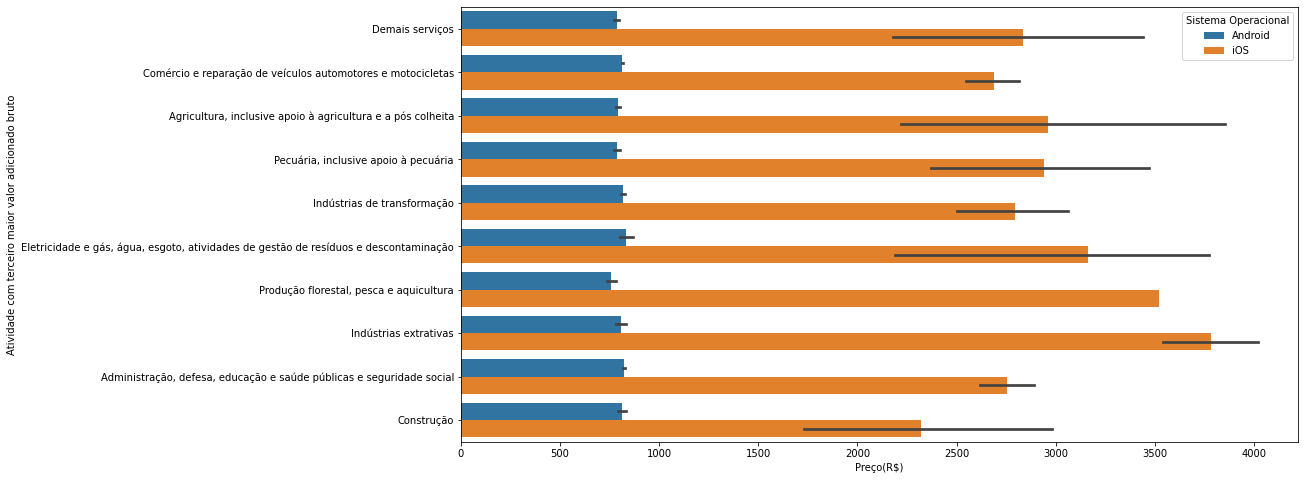

In [84]:
for data in atributos:
    plt.subplots(figsize=(15,8))
    print(data,"X Preço(R$)")
    sns.barplot(y = data ,x= 'Preço(R$)', data = df, hue='Sistema Operacional')
    plt.show()

# Análise por agrupamento

## Agrupamento por Amazônia Legal

In [85]:
df_Amazonia= df.groupby(['Amazônia Legal','Sistema Operacional']).agg({'Preço(R$)' : ['median','mean','max','min']}).reset_index()
df_Amazonia

Amazônia Legal Sistema Operacional Preço(R$)                               
                                        median         mean        max    min
0            Não             Android    825.55   819.473289  4108.4300  110.0
1            Não                 iOS   3523.35  2721.482749  6088.0085  559.0
2            Sim             Android    747.12   791.217473  4108.4300  120.0
3            Sim                 iOS   3523.35  2876.036126  6088.0085  699.0

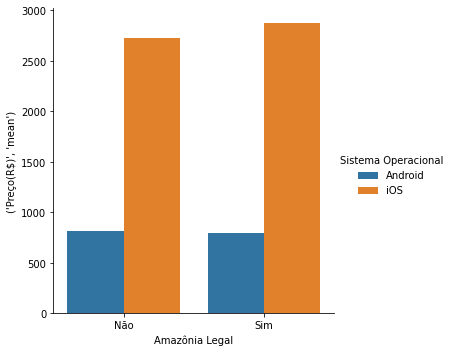

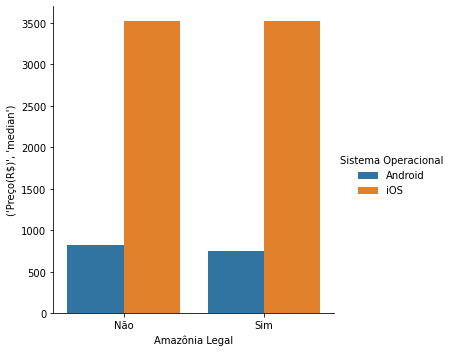

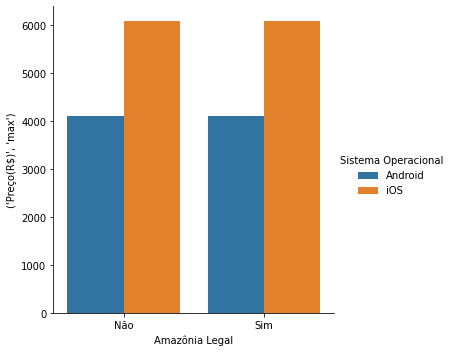

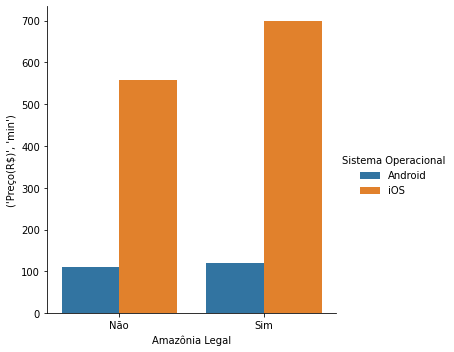

In [86]:
sns.catplot(x="Amazônia Legal", y=("Preço(R$)","mean"),hue="Sistema Operacional",data=df_Amazonia, kind="bar")
sns.catplot(x="Amazônia Legal", y=("Preço(R$)","median"),hue="Sistema Operacional",data=df_Amazonia, kind="bar")
sns.catplot(x="Amazônia Legal", y=("Preço(R$)","max"),hue="Sistema Operacional",data=df_Amazonia, kind="bar")
sns.catplot(x="Amazônia Legal", y=("Preço(R$)","min"),hue="Sistema Operacional",data=df_Amazonia, kind="bar")

## Agrupamento por Semiárido

In [87]:
df_Semiarido= df.groupby(['Semiárido','Sistema Operacional']).agg({'Preço(R$)' : ['median','mean','max','min']}).reset_index()
df_Semiarido

Semiárido Sistema Operacional Preço(R$)                               
                                   median         mean        max    min
0       Não             Android    825.55   819.055048  4108.4300  120.0
1       Não                 iOS   3523.35  2724.003995  6088.0085  559.0
2       Sim             Android    759.05   780.680776  4108.4300  110.0
3       Sim                 iOS   3523.35  2880.430509  6088.0085  848.0

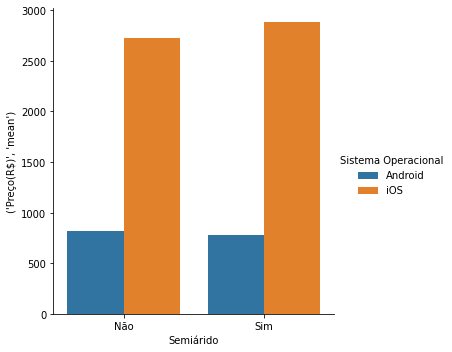

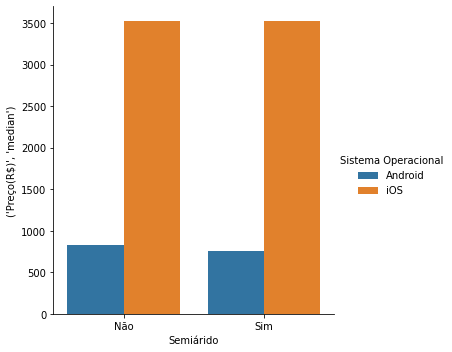

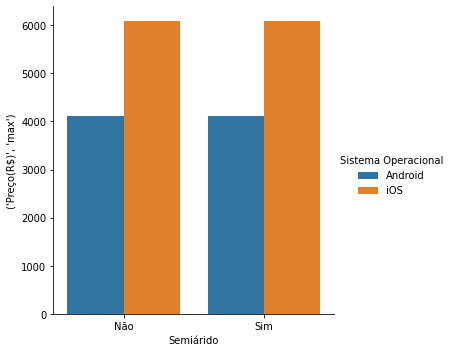

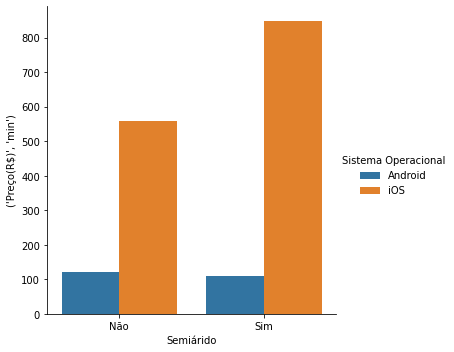

In [88]:
sns.catplot(x="Semiárido", y=("Preço(R$)","mean"),hue="Sistema Operacional",data=df_Semiarido, kind="bar")
sns.catplot(x="Semiárido", y=("Preço(R$)","median"),hue="Sistema Operacional",data=df_Semiarido, kind="bar")
sns.catplot(x="Semiárido", y=("Preço(R$)","max"),hue="Sistema Operacional",data=df_Semiarido, kind="bar")
sns.catplot(x="Semiárido", y=("Preço(R$)","min"),hue="Sistema Operacional",data=df_Semiarido, kind="bar")

## Agrupamento por Nome da Grande Região

In [89]:
df_Regiao= df.groupby(['Nome da Grande Região','Sistema Operacional']).agg({'Preço(R$)' : ['median','mean','max','min']}).reset_index()
df_Regiao

Nome da Grande Região Sistema Operacional Preço(R$)                          \
                                               median         mean        max   
0          Centro-oeste             Android    825.85   839.245743  4108.4300   
1          Centro-oeste                 iOS   3523.35  2911.640788  6088.0085   
2              Nordeste             Android    759.05   784.621768  4108.4300   
3              Nordeste                 iOS   3523.35  2840.255830  6088.0085   
4                 Norte             Android    747.00   780.024814  4108.4300   
5                 Norte                 iOS   3523.35  2788.667669  4021.3500   
6               Sudeste             Android    825.85   837.839271  4108.4300   
7               Sudeste                 iOS   3343.10  2669.889360  6088.0085   
8                   Sul             Android    825.55   832.267186  4108.4300   
9                   Sul                 iOS   2070.85  2606.200263  6088.0085   

          
     min  
0  120.0  
1  559.0  
2  110.0  
3  699.0  
4  120.0  
5  699.0  
6  120.0  
7  699.0  
8  120.0  
9  699.0

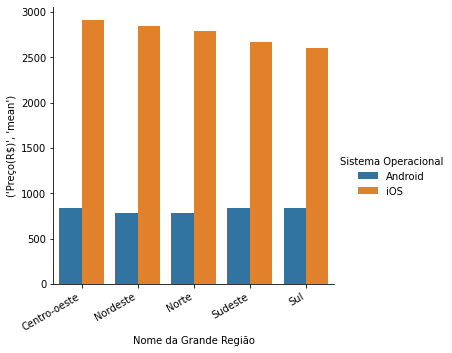

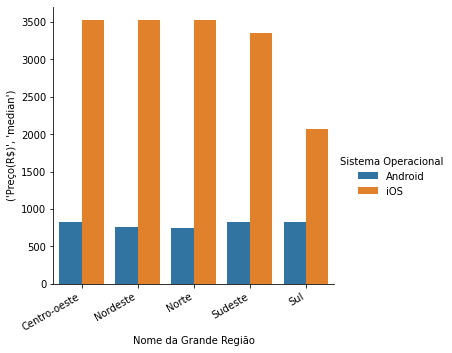

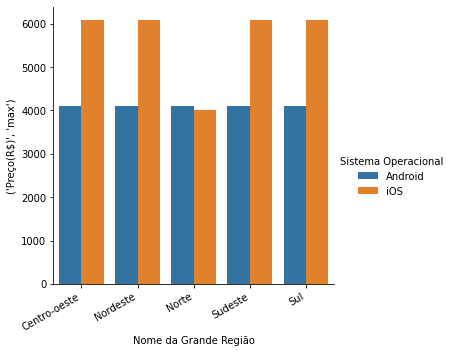

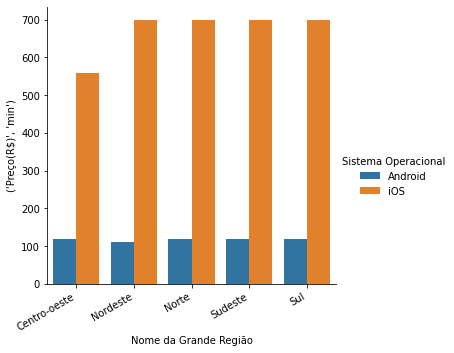

In [90]:
ax = sns.catplot(x="Nome da Grande Região", y=("Preço(R$)","mean"),hue="Sistema Operacional",data=df_Regiao, kind="bar")
ax.fig.autofmt_xdate()
ax=sns.catplot(x="Nome da Grande Região", y=("Preço(R$)","median"),hue="Sistema Operacional",data=df_Regiao, kind="bar")
ax.fig.autofmt_xdate()
ax=sns.catplot(x="Nome da Grande Região", y=("Preço(R$)","max"),hue="Sistema Operacional",data=df_Regiao, kind="bar")
ax.fig.autofmt_xdate()
ax=sns.catplot(x="Nome da Grande Região", y=("Preço(R$)","min"),hue="Sistema Operacional",data=df_Regiao, kind="bar")
ax.fig.autofmt_xdate()